![logo price](./imgs/massp_logo.png)

## Instructors
* Nguyễn Hoàng Phương

# Phần I -   Bài toán Regression - xây dựng mô hình dự đoán giá nhà 
![home price](./imgs/home_prices.png)


###  Mô tả :
 - Dữ liệu huấn luyện (trainig set): Là một bảng biểu bao gồm
      + đầu vào: thông tin tổng quan của một căn nhà (diện tích các phòng, các thang điểm đánh giá căn nhà,... )
      + đầu ra:   Giá bán của căn nhà tại một thời điểm. 
 - Mục đích: Xây dựng mô hình học máy dựa trên tập training (bao gồm đầu vào và đầu ra) để dự đoán giá của căn nhà (không có trên tập training) khi biết trước các số liệu tổng quan.  

## Tham khảo

#### Kaggle 
   + [House prices competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) 
   + [Comprehensive data exploration](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)
   + [Stacked regressions to predict  House Prices](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)
        
#### Coursera
   + [Applied Data Science with Python](https://www.coursera.org/specializations/data-science-python) 
   + [Data Visualization with Python](https://www.coursera.org/learn/python-for-data-visualization)


## Outline

- <a href='#1'>1. Giới thiệu dữ liệu</a>
    - <a id='#1-1'>1.1. Thông tin tổng quan dữ liệu </a> 
    - <a id='#1-1'>1.2. Thông tin tổng quan target </a> 
    - <a id='#1-1'>1.3. Metric đánh giá </a>

- <a href='#2'>2. Khai phá dữ liệu </a>  
    - <a id='#2-1'>2.1. Tổng quan dữ liệu thiếu </a> 
    - <a id='#2-1'>2.2. Trường dữ liệu số (numeric) </a> 
    - <a id='#2-2'>2.3. Trường dữ liệu phân loại (categorical)</a>
- <a href='#3'>3. Feature engineering </a>
    - <a id='#3-1'>3.1. Xử lý dữ liệu thiếu  </a>
    - <a id='#3-2'>3.2. Xử lý dữ liệu số </a> 
    - <a id='#3-2'>3.3. Xử lý dữ liệu phân loại </a> 
- <a href='#4'>4. Xây dựng mô hình </a>
    - <a id='#4-1'>3.1. Xây dựng validation </a>
    - <a id='#4-2'>3.2. Xây dựng mô hình</a> 


### Nhập các gói thư viện 

In [304]:
# import packages
# thu vien doc du lieu bang
import pandas as pd
# thu vien in hình anh 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# thu vien tinh toan 
from scipy.stats import norm
from scipy import stats
import warnings
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings('ignore')
%matplotlib inline
# thu vien chia Kfold
from sklearn.model_selection import KFold
# thu vien chia tinh toan mean_square_error
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Đọc file dữ liệu 

In [305]:
#read file
train = pd.read_csv('./data/house-prices/train.csv')
test  = pd.read_csv('./data/house-prices/test.csv')

# <a id='1'>1.Giới thiệu về data</a>

In [306]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [307]:
print('Kích thước tập train: {}'.format(train.shape))
print('Kích thước tập test : {}'.format(test.shape))

Kích thước tập train: (1460, 81)
Kích thước tập test : (1459, 80)


+ Tập train có 80 trường dữ liệu (không bao gồm cột ID)
+ Tập test có 79 trường dữ liệu (không bao gồm cột ID) 

 


### Tìm hiểu các hàng có trùng nhau hay không? 

In [308]:
# Find a duplicate rows
duplicate_row = train[train.duplicated()]
print(duplicate_row)

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]


Không có 2 hàng nào có dữ liệu trùng nhau hoàn toàn. 

# <a id='1.1'>1.1. Thông tin các trường dữ liệu </a> 

In [309]:
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [310]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

#### Các cột dữ liệu được mô tả ở file "data_description.txt". 

Ngoài ra có thể tìm hiểu thông tin mô tả các trường dữ liệu ở [link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

#### Một số thông tin tổng quan  của bảng biểu giá nhà: 

+ SalePrice — Giá bán của bất động sản được tính bằng USD (ex: 181500 USD), đây là label của dữ liệu 

+ MSSubClass — Kiểu nhà và thông tin liên quan đến việc mua bán (ex: 1-STORY 1946 & NEWER ALL STYLES )

+ MSZoning — Phân loại khu vực của nhà cần bán (ex: Agriculture, Residential High Density, ... )

+ LotFrontage — Số "feet" (1 feet = 30.48 cm) từ nhà tới đường (ex: 50, 51, ...) 

+ LotArea — Số feet square  của căn nhà (1 feet square = 0.0929 mét vuông), (ex: 6120,...)

+ Street — Loại đường (Type pf road access)

+ Alley — Loại lối vào hẻm (ex: Grvl- Gravel, Pave-Paved)

+ LotShape — General shape of property

+ LandContour — Độ phẳng của nhà (ex: Lvl : Near Flat/Level, Low : Depression  )

+ Utilities — Các loại tiện ích có sẵn (eg: All public Utilities, Electricity only  )

+ LotConfig — Thông tin vị trí nhà, ở góc, nhà 2 mặt đường,... (ex: Inside lot, Frontage on 2 sides of property)

Mục đích xây dựng mô hình dự đoán giá nhà cuối cùng (SalePrice) dựa vào thông tin của 79 trường dữ liệu (hoặc dữ liệu ngoài )

# <a id='1.2'>1.2. Thông tin tổng quan target </a> 

In [311]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# <a id='1.2.1'>1.2.1 Phân bố của trường target </a> 

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

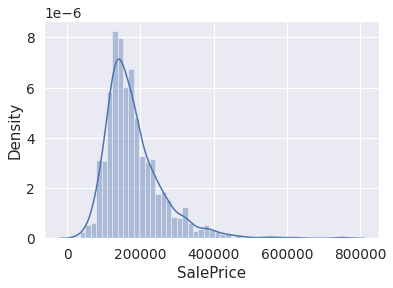

In [312]:
sns.distplot(train['SalePrice'])

# <a id='1.3'>1.3 Chọn metric đánh giá  </a> 

Chúng ta có thể thấy là target có giá trị khá lớn. Với  những dữ liệu này, thường sẽ sử dụng Root Mean Squared Logarithmic Error (RMSLE) làm thước đo đánh giá mức độ chính xác của mô hình. RMSLE được tính bằng công thức 

\begin{equation*}
\epsilon = \sqrt{\frac{\sum_{t=1}^{n}(\log (y_t+1)-\log (\widehat{y_t}+1))^2}{n}},
\end{equation*}

trong đó, 
+ $\epsilon$ là giá trị RMSLE,
+ $n$ là tổng số quan sát trong tập dữ liệu,
+ $\widehat{y_t}$ là giá trị dự đoán của mô hình của mẫu thứ $t$
+ $y_t$ là target của mẫu thứ $t$.

# <a id='2'>2 Khai phá dữ liệu (EDA) </a> 

# <a id='2.1'>2.1 Xem xét dữ liệu thiếu (missing data) </a> 

Hàm in ra tỉ lệ dữ thiếu (missing data) của các trường dữ liệu 

In [313]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()       
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)       
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)        
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})        
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    return mis_val_table_ren_columns

In [314]:
missing_values_table(train).head(10)

,Missing Values,% of Total Values
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5


###  Dựa vào bảng dữ liệu thống kê các dữ liệu thiếu có thể ít nhiều thấy sự tương quan (correlation) giữa các cột dữ liệu, từ có có định hướng tốt hơn khi phân tích dữ liệu trong các bước tiếp theo: 

+ Các cột "GarageType", "GarageYrBlt", "GarageFinis", "GarageQual", "GarageCond" có mối quan hệ với nhau (cùng mô tả thông tin về garage nhà). 
+ Trong một số trường hợp, các cột có tỷ lệ missing giống nhau sẽ có correlation cao => có thể xóa đi các cột ít thông tin hơn. 
+ Dữ liệu thiếu thường do các nguyên nhân: 
    + Điều kiện chủ quan (nhầm lẫn, điền thiếu thông tin khi thống kê, ...)
    + Điều kiện khách quan (bản thân missing data chứa đựng thông tin. Ví dụ: NaN từ các cột GarageType xuất phát từ nguyên nhân nhà không có garage)

### Phân loại các cột dữ liệu: 
 + Đối với dữ liệu bảng biểu, có 2 loại dữ liệu chính: dữ liệu dạng phân loại (categorical) và dữ liệu số (numeric). Ngoài ra còn có dữ liệu text, workshop sẽ không đi sâu vào loại dữ liệu này
 + Việc phân loại và nhận biết dữ liệu giúp chúng ta có thể có cách xử lý tốt với từng loại dữ liệu 

In [315]:
train.dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

# <a id='2.1*'>2.1* Phân tích target (SalePrice) </a> 

### Tổng quan về target

In [316]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Hàm Series.describes() đưa ra các giá trị count, mean, std, min, max, ... của một chuỗi.

Từ hàm thống kê trên cũng cho thấy: 
    
+ Hầu hết giá trị nhà nằm trong khoảng $[130.000, 215.000]$ 

+ Có sự sai lệch lớn giữa giá trị $min$ và $max$ ($35.000$ vs $755.000$)

Với các bài toán regression, khi có sự sai lệch (skewed) lớn ở trường numeric, chúng ta có thể sử dụng các phép biến đổi $np.log1p()$


Skew is: 1.8828757597682129


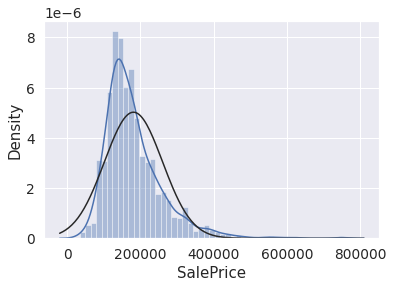

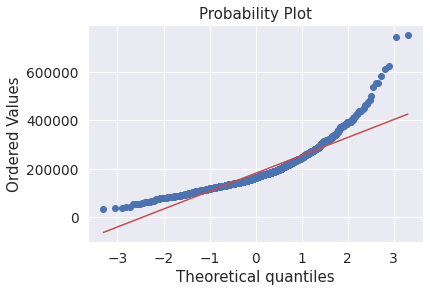

In [317]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
print ("Skew is:", train.SalePrice.skew())

<AxesSubplot:xlabel='SalePrice'>

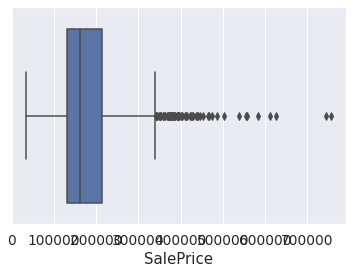

In [318]:
sns.boxplot(train['SalePrice'], orient='v' )

Từ 3 đồ thị trên chúng ta có một số nhận xét: 
+ Biến giá nhà (SalePrice) không phải là phân phối chuẩn
+ Biến giá nhà bị lệch về bên phải (right-skewed)
+ Có nhiều khoảng giá trị bất thường (outlier)



### Sử dụng transform log(1+x) cho trường target

Chúng ta sử dụng phép biến đổi log cho target vì: 
 + Metric được tính toán dựa trên RMSLE
 + Sử dụng biến đổi log giúp cho cột dữ liệu ít bị sai lệch (skewed) hơn
 + Giá trị target có thể hồi phục lại bằng cách sử dụng phép biến đổi ngược (phép biến đổi exp)

Skew is: 0.12134661989685333


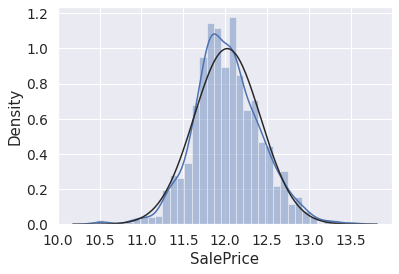

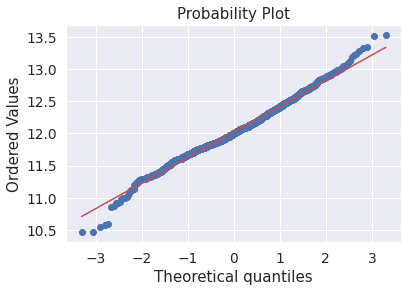

In [319]:
sns.distplot(np.log1p(train['SalePrice']), fit=norm);
fig = plt.figure()
res = stats.probplot(np.log1p(train['SalePrice']), plot=plt)
print ("Skew is:", np.log1p(train.SalePrice).skew())

# <a id='2.1'>2.1. Phân tích dữ liệu số  </a>   

Sử dụng hàm .select_dtypes() để trả về các cột có dữ liệu số (hoặc phân loại)

In [320]:
numeric_features = train.select_dtypes(include=[np.number])


# <a id='2.1.1'>2.1.1 Ma trận correlation</a>   

Bảng correlation cho thấy sự tương quan giữa các trường dữ liệu có dạng số, từ đó giúp định hướng phân tích các cột dữ liệu.

<AxesSubplot:>

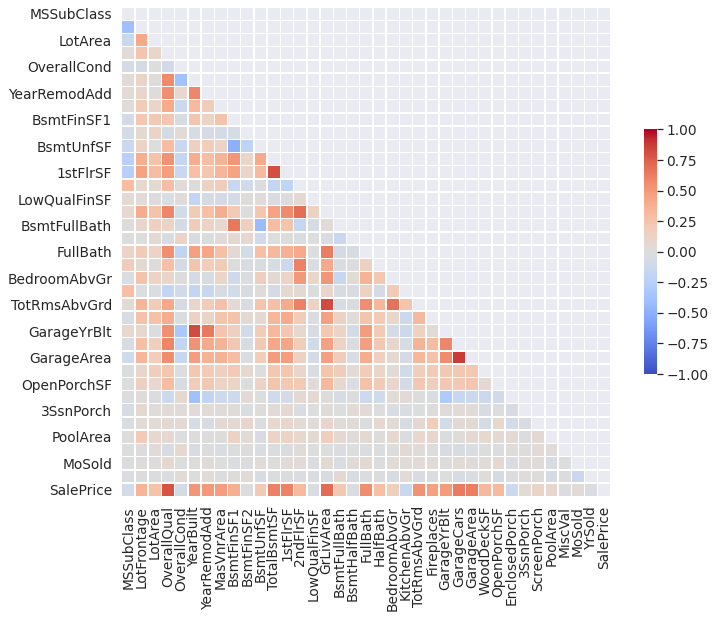

In [321]:
corr = train.corr()  # Compute the correlation matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True # Generate a mask for the upper triangle
f, ax = plt.subplots(figsize=(12, 9))# Set up the matplotlib figure
sns.heatmap(corr, mask=mask, cmap='coolwarm',
            vmin = -1,vmax = 1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})# Draw the heatmap with the mask and correct aspect ratio

+ Ma trận heatmap là cách tốt nhất để thấy được mối quan hệ giữa các trường số với nhau. 
+ Mỗi tọa độ của ma trận thể hiện mối tương quan giữa 2 cột. 
+ Correlation càng gần 1, thì 2 trường càng có sự giống nhau.
+ Nếu các trường (khác target) có correlation cao, có thể xem xét bỏ đi một cột.
+ Nếu một trường có correlation cao với target, thì trường đó được xem xét như một feature quan trọng.


# <a id='2.1.2'>2.1.2 Correlation giữa các trường với target (SalePrice)</a>  

Vẽ heatmap của ma trận correlation giữa target và 15 trường có có correlation cao nhất 

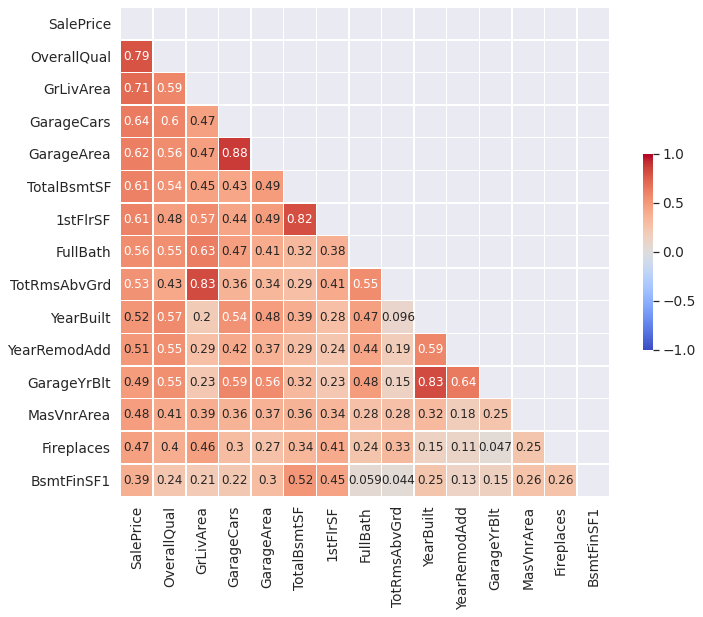

In [322]:
f, ax = plt.subplots(figsize=(12, 9))
k = 15 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
#cm = np.corrcoef(train[cols].values.T)
cm = train[cols].corr()
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, mask = mask, square = True,
                 linewidths = .5,
                 cmap = 'coolwarm',
                 cbar_kws = {'shrink': .4,
                             'ticks' : [-1, -.5, 0, 0.5, 1]},
                 vmin = -1,
                 vmax = 1,
                 annot = True,
                 annot_kws = {'size': 12}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

+ In ra 15 trường có correlation cao nhất với target
+ Trong đó có 11 trường có correlation lớn hơn 0.5

# <a id='2.1.3'>2.1.3 Quan sát</a> 

+ 'OverallQual', 'GrLivArea' có mối quan hệ chặt chẽ với 'SalePrice'. 
    + OverallQual: Trường chứa thông tin đánh giá vật liệu tổng thể và hoàn thiện của ngôi nhà, xếp từ 1 đến 10. 1: Very poor, 10: very excellent 
    + GrLivArea: Diện tích sống của căn nhà
+  'GarageCars', 'GarageArea' cũng là feature quan trọng và chúng có mối quan hệ chặt chẽ với nhau
    + GarageCars: Diện tích chứa được của garage
    + GarageArea: Diện tích thật của garage
+  'TotalBsmtSF' và  '1stFloor' cũng có mối quan hệ chặt chẽ với nhau
    + 'TotalBsmtSF': Tổng diện tích tầng hầm 
    + '1stFloor': Tổng diện tích tầng 1

### Kiểm tra mối tương quan (correlation) giữa target và các trường dữ liệu số

+ SalePrice và GrLivArea:

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

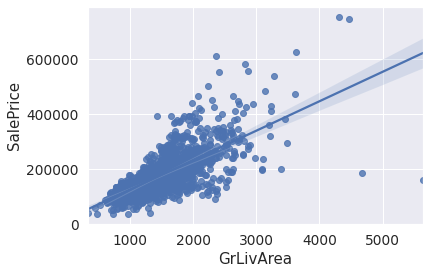

In [323]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
#scatter plot
sns.regplot(data = train, x= var, y="SalePrice")

Nhận xét : 
   + Thấy mối quan hệ "tuyến tính" giữa trường 'GrLivArea' và target
   + Có một số giá trị ngoại lệ (outlier). Những hàng có giá trị "Grlivrea" (Diện tích nhà) đạt giá trị trên 4500, nhưng giá nhà dưới 200.000

+ Kiểm tra những hàng dữ liệu bất thường (outlier)

In [324]:
train.loc[(train['GrLivArea']>4500)&(train['SalePrice']<200000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


#### Lưu trữ lại các quan sát có số liệu bất thường

In [325]:
outlier_raws = [523, 1298]

#### SalePrice và OverallQual:

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

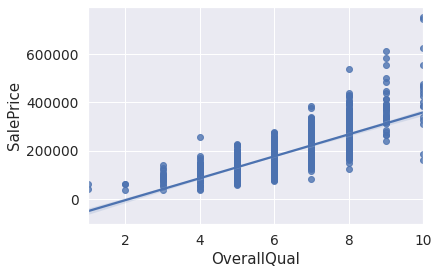

In [326]:
#scatter plot grlivarea/saleprice
var = 'OverallQual'
#scatter plot
sns.regplot(data = train, x= var, y="SalePrice")

Thấy mối quan hệ "tuyến tính" giữa trường 'OverallQual' và target

### Xem xét distribution của các trường quan trọng 

#### Trường GrLivArea (Tổng diện tích căn nhà)

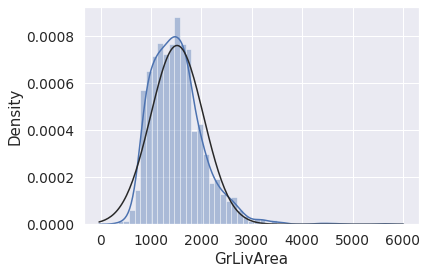

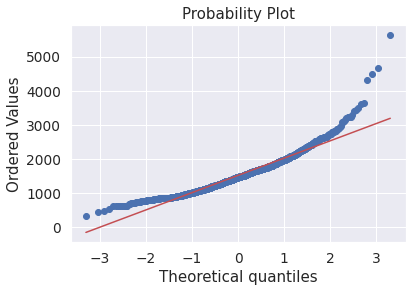

In [327]:
#histogram and normal probability plot
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

### Trường GrLivArea sau khi sử dụng transform log

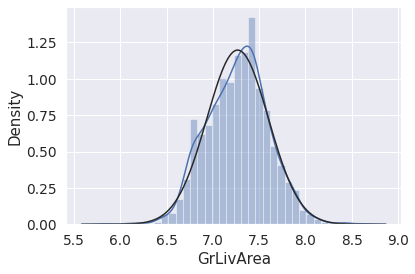

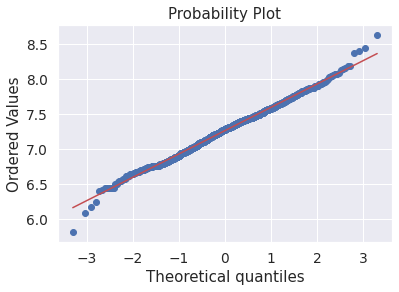

In [328]:
sns.distplot(np.log1p(train['GrLivArea']), fit=norm);
fig = plt.figure()
res = stats.probplot(np.log1p(train['GrLivArea']), plot=plt)

Có thể thấy phân phối của trường log của "GrLivArea" gần với phân phối chuẩn 

#### Trường TotalBsmtSF

Sử dụng phương pháp tương tự với trường dữ liệu TotalBsmtSF (Tổng diện tích tầng hầm)


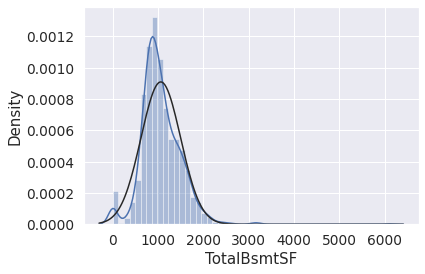

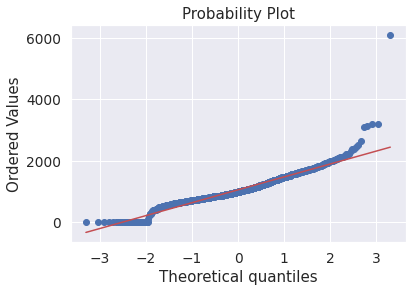

In [329]:
sns.distplot(train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

Sử dụng phép biến đổi log(1+x) cho trường dữ liệu "TotalBsmtSF"

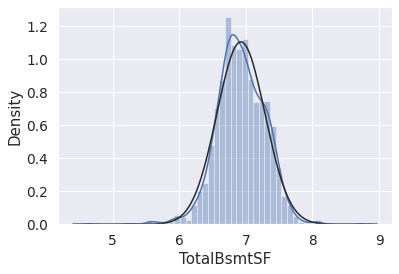

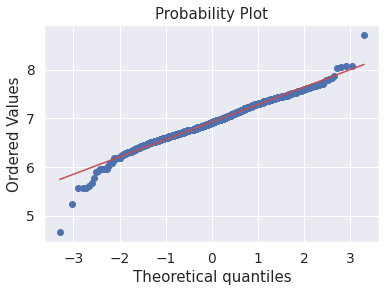

In [330]:
sns.distplot(np.log(train[np.log1p(train['TotalBsmtSF'])>0]['TotalBsmtSF']), fit=norm);
fig = plt.figure()
res = stats.probplot(np.log(train[np.log1p(train['TotalBsmtSF'])>0]['TotalBsmtSF']), plot=plt)

# <a id='2.2'>2.2. Phân tích dữ liệu phân loại (Categorical) </a>  

# <a id='2.2.1'>2.2.1. Tổng quan dữ liệu phân loại (Categorical) </a>  

In [331]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


+ unique: Số lớp phân loại của trường
+ count: Số quan sát (không bao gồm dữ liệu thiếu)
+ top: Lớp phân loại có tuần suất xuất hiện lớn nhất
+ freq: Số lần xuất hiện của lớp phân loại có tần suất lớn nhất

Ví dụ, nhìn vào bảng, quan sát trường dữ liệu "GarageType": có 1379 dữ liệu không NAN, có 6 lớp phân loại, phân loại "attchd" có tuần suất xuất hiện nhiều nhất với 870/1460 lần.


# <a id='2.2.2'>2.2.2. Quan sát một số trường phân loại (Categorical) </a>   ###  



Sử dụng lệnh select_dtypes(exclude=[np.number]) để tìm kiếm các trường phân loại 

In [332]:
categorical_features = train.select_dtypes(exclude=[np.number])
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

#### Lưu trữ lại các trường phân loại 

In [333]:
categorical_columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

#### Đối với bài toán regression, với các trường phân loại (categorical), chúng ta có thể phân tích theo 2 hướng chính: 
   + Tính tần suất xuất hiện, để xem xét sự phân bố của các lớp phân loại 
   + Tính trung bình của target đối với mỗi lớp phân loại   
    
    
#### Trường Sale Condition
+ Tần suất xuất hiện của trường Sale Condition

In [334]:
def plot_feature(X):
    y = train.loc[X.index, 'SalePrice']
    plt.scatter(X, y)
    plt.xlabel('phân loại')
    plt.ylabel('SalePrice')
    plt.title(X.name)

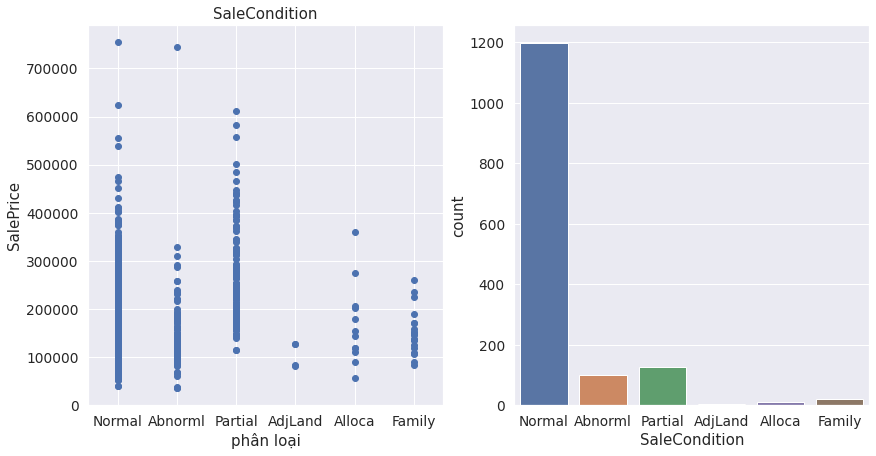

In [335]:
feature = 'SaleCondition'
X = train[feature].dropna()
fig , (ax1, ax2) = plt.subplots(1,2, figsize=(14,7), sharex=True)
plt.subplot(ax1)
plot_feature(X)
plt.subplot(ax2)
if train[feature].dtype == np.dtype('object'):
    sns.countplot(X)
else:
    sns.distplot(X)

Có thể thấy lớp phân loại "Normal" trong trường phân loại "SaleCondition" chiếm đa số. Giá nhà của lớp phân loại này giao động từ $50.000$ đến $300.000$.

#### Xem giá nhà trung bình của các phân loại của trường Sale Condition 

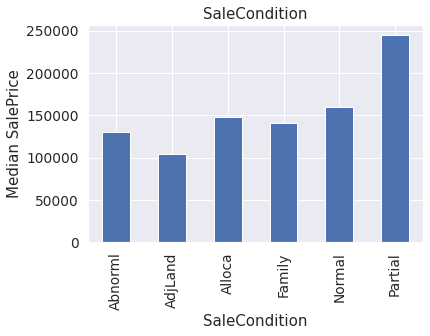

In [336]:
train.groupby('SaleCondition')['SalePrice'].median().plot.bar()
plt.xlabel('SaleCondition')
plt.ylabel('Median SalePrice')
plt.title('SaleCondition')
plt.show()

#### Trường dữ liệu Utilities

<function matplotlib.pyplot.show(close=None, block=None)>

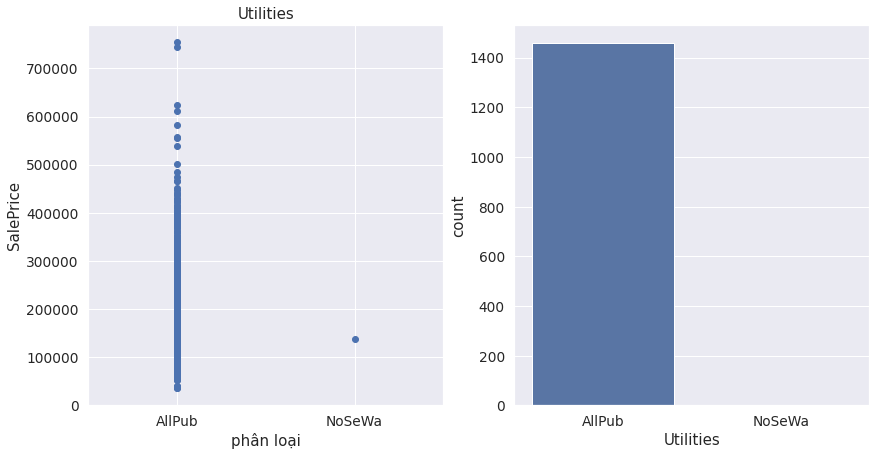

In [337]:
feature = 'Utilities'
X = train[feature].dropna()
fig , (ax1, ax2) = plt.subplots(1,2, figsize=(14,7), sharex=True)
plt.subplot(ax1)
plot_feature(X)
plt.subplot(ax2)
if train[feature].dtype == np.dtype('object'):
    sns.countplot(X)
else:
    sns.distplot(X)
plt.show


#### Trường dữ liệu Utilities chênh lệch rất lớn giữa các lớp. Từ đó có thể xem xét drop (xóa) trường dữ liệu này khi làm "feature engineering"

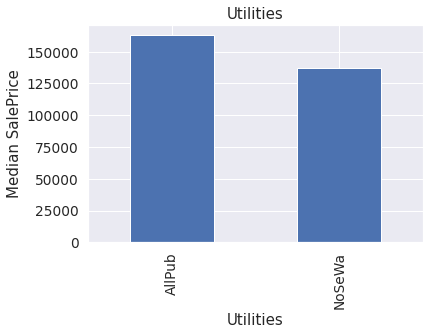

In [338]:
train.groupby('Utilities')['SalePrice'].median().plot.bar()
plt.xlabel('Utilities')
plt.ylabel('Median SalePrice')
plt.title('Utilities')
plt.show()

#### Tương tự có thể làm thống kê cho các trường phân loại khác 

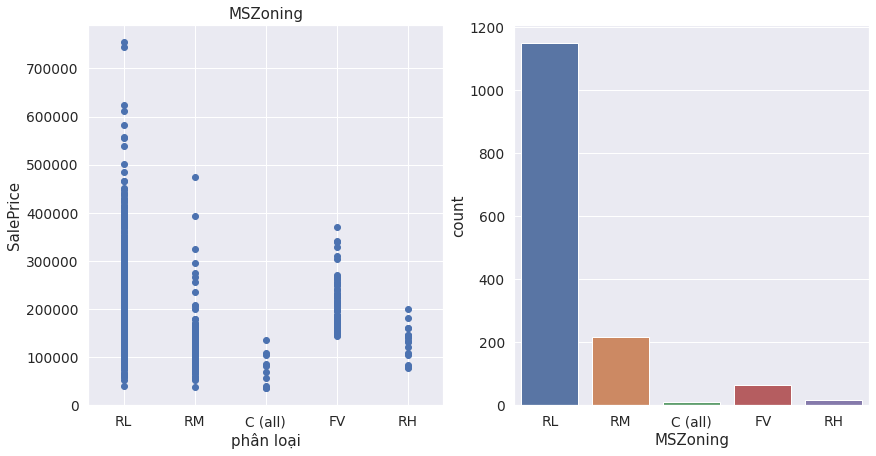

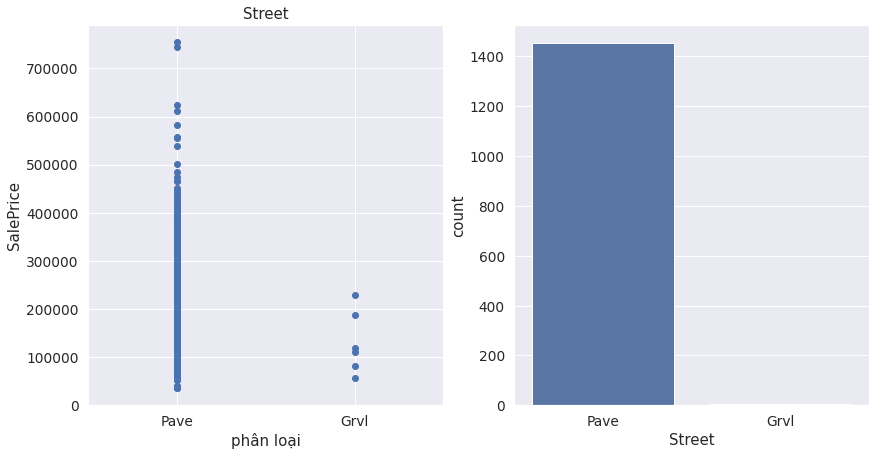

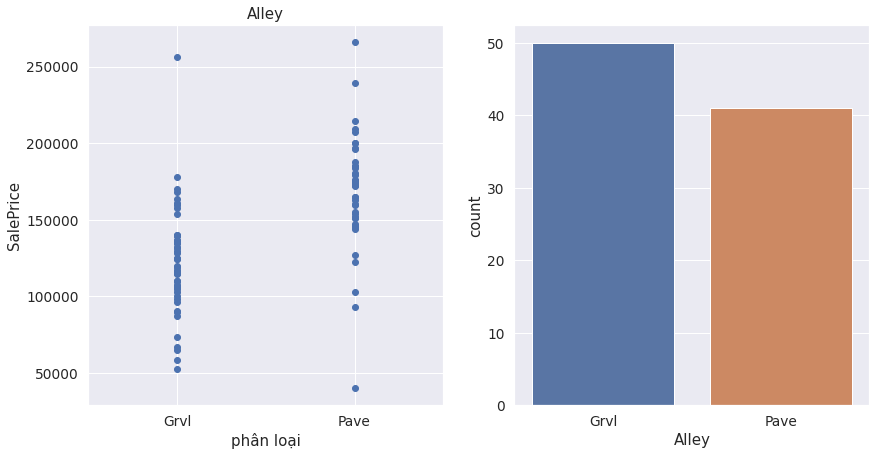

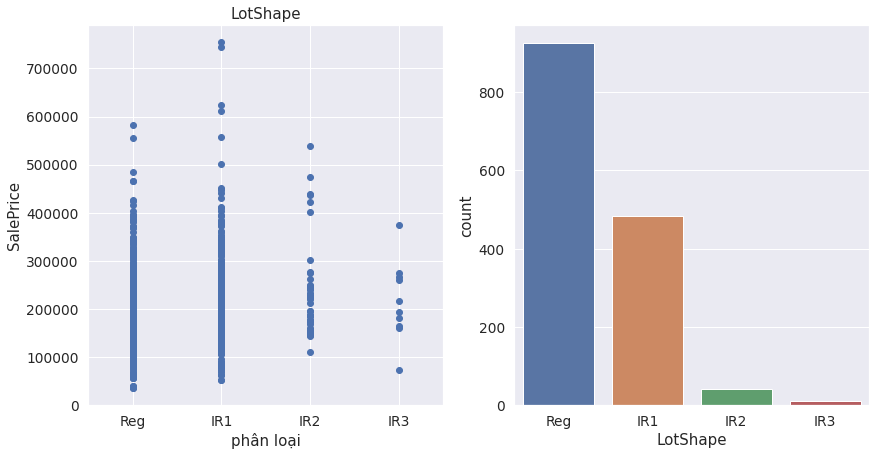

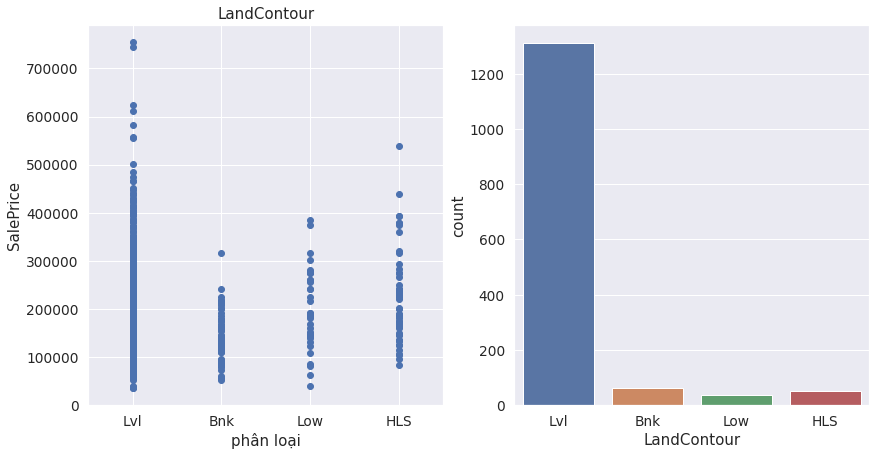

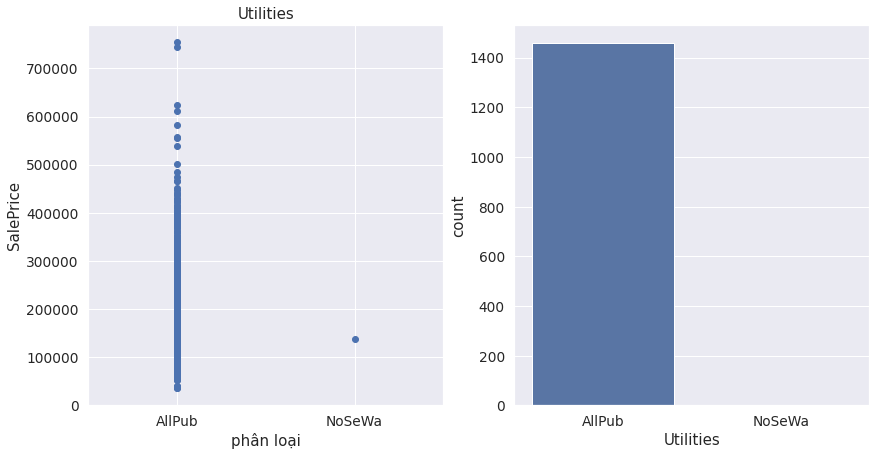

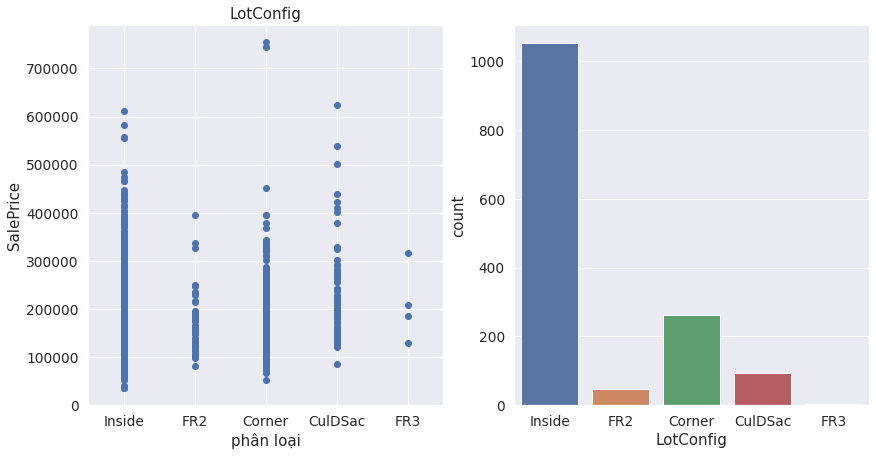

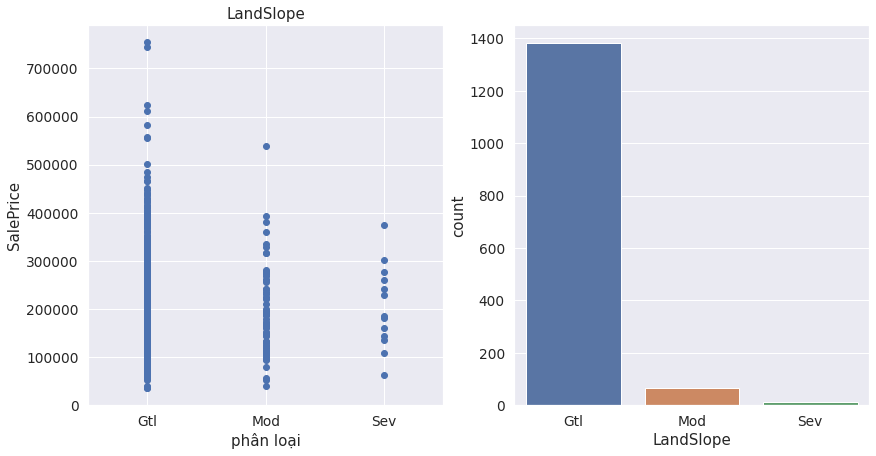

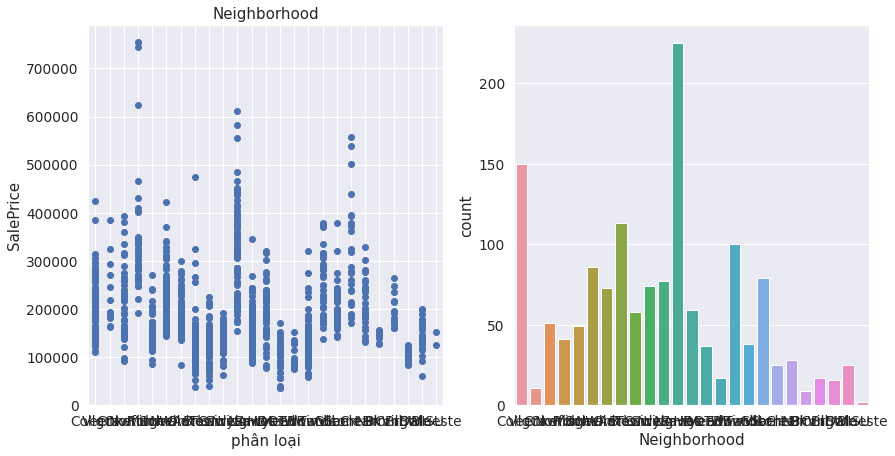

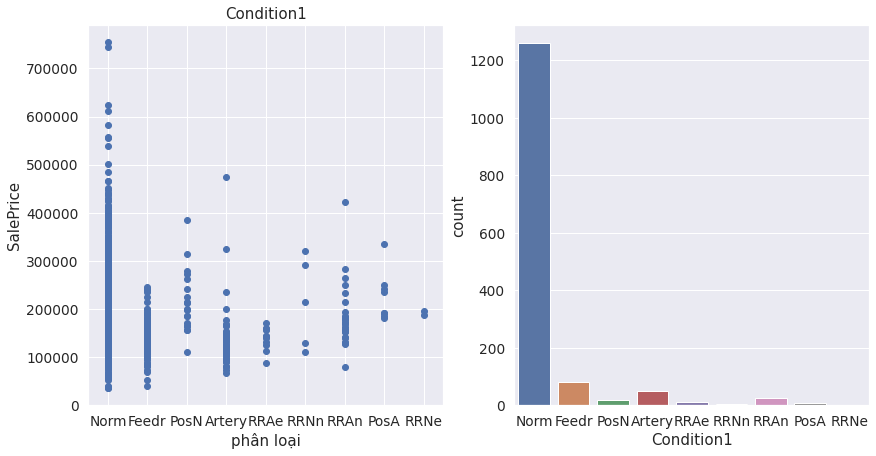

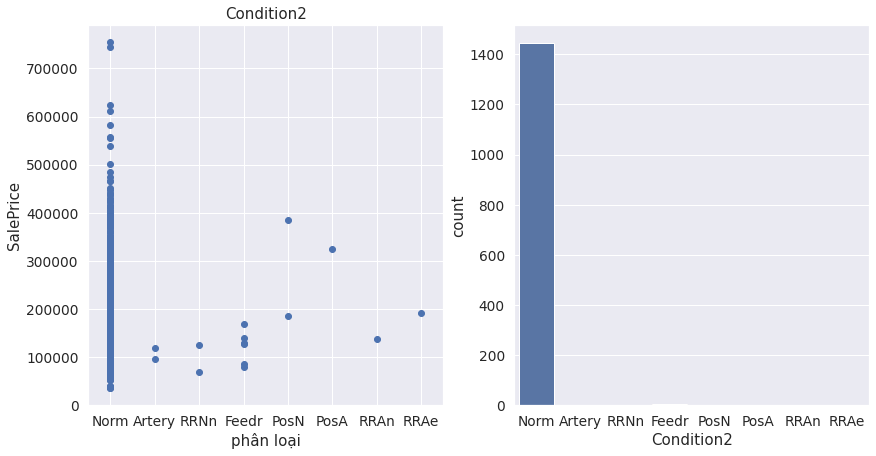

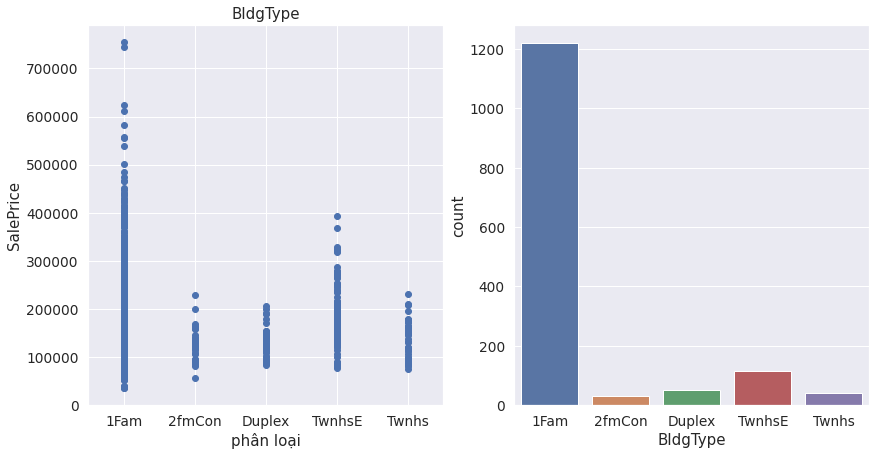

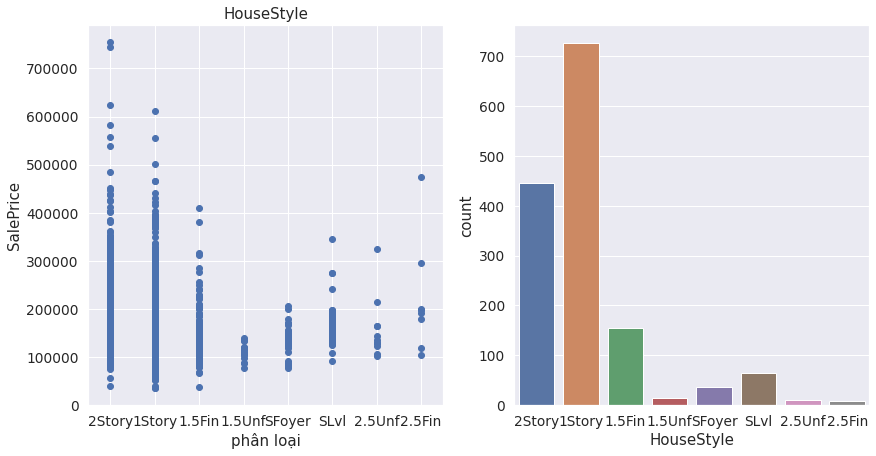

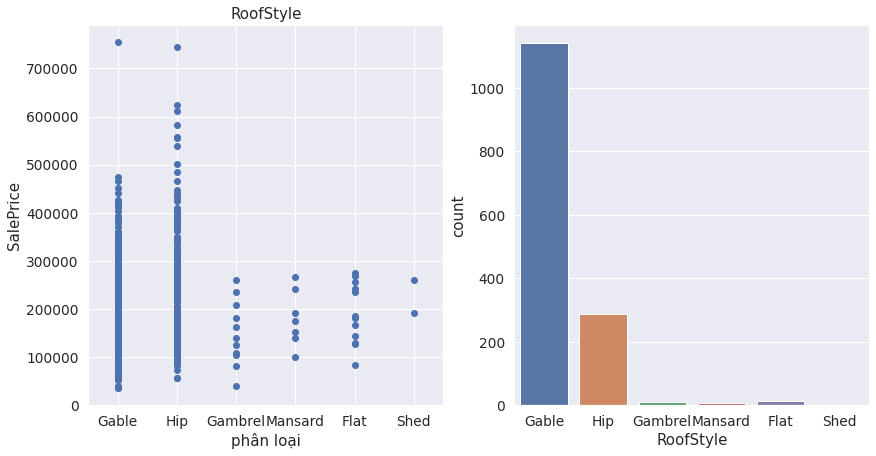

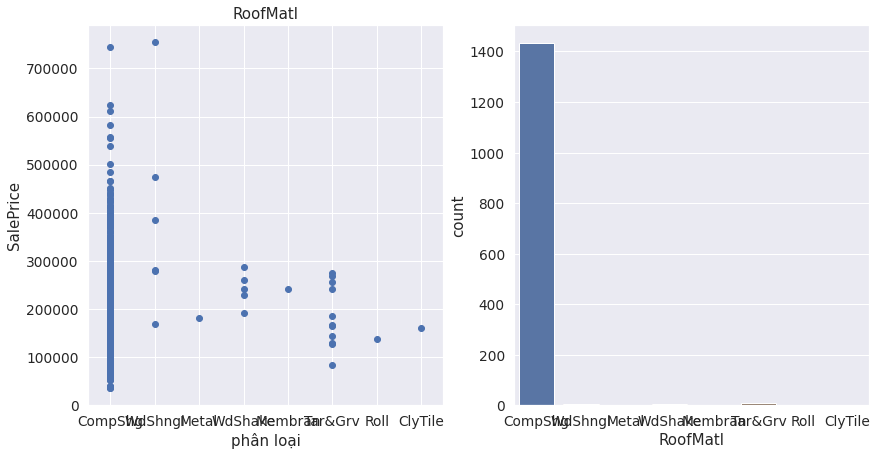

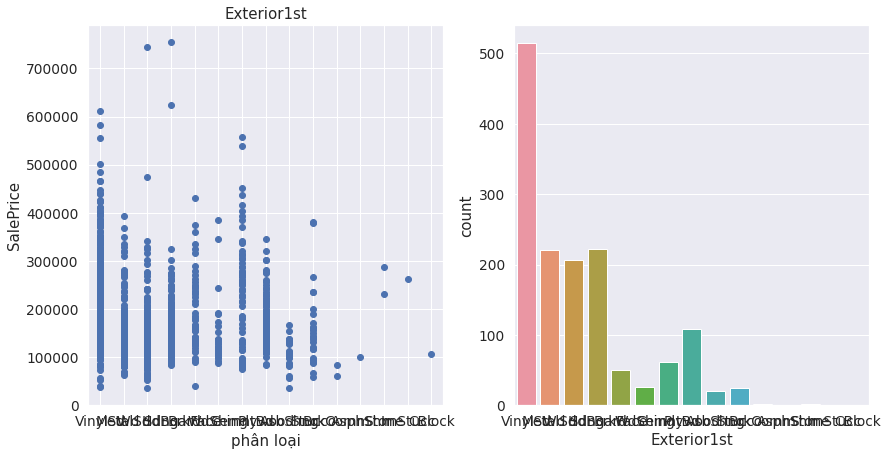

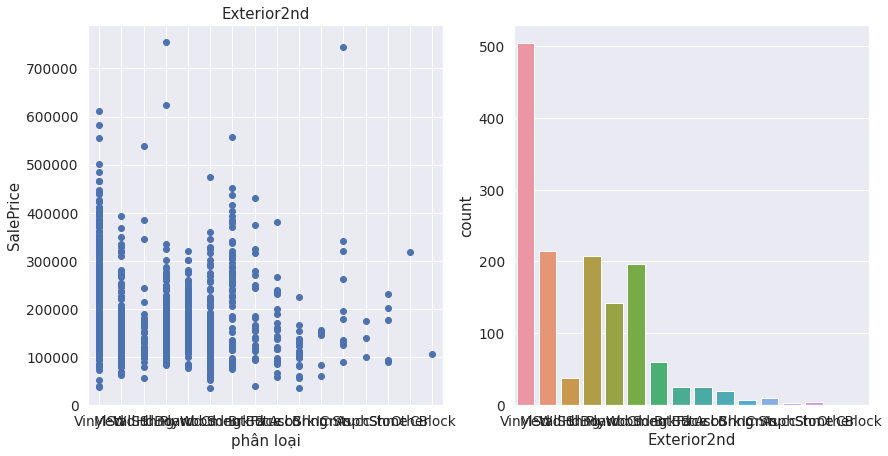

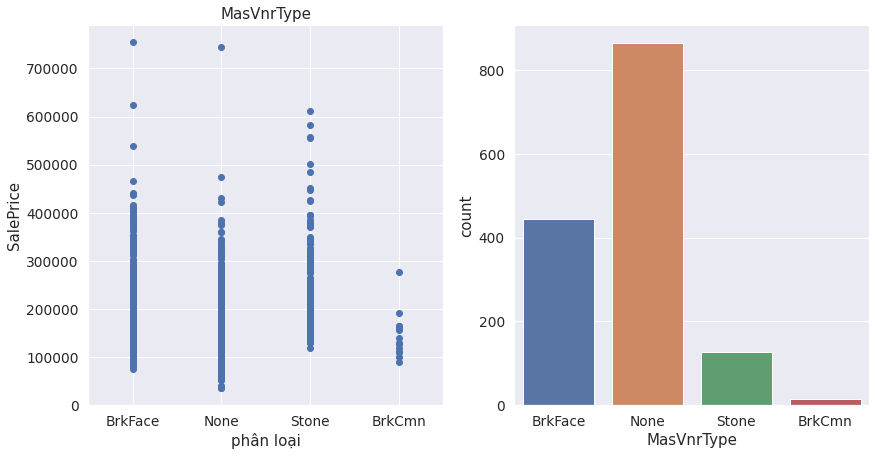

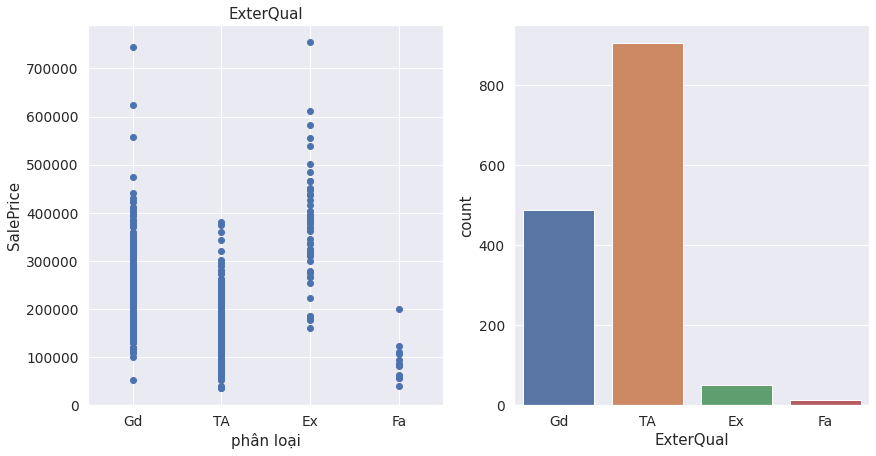

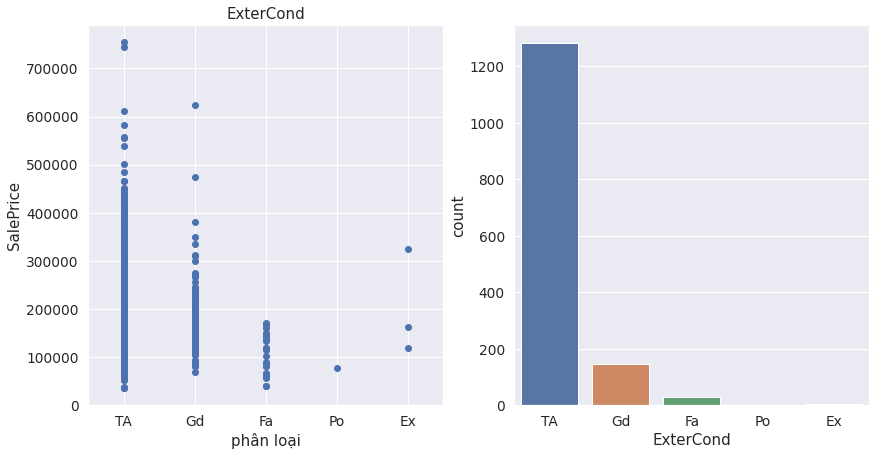

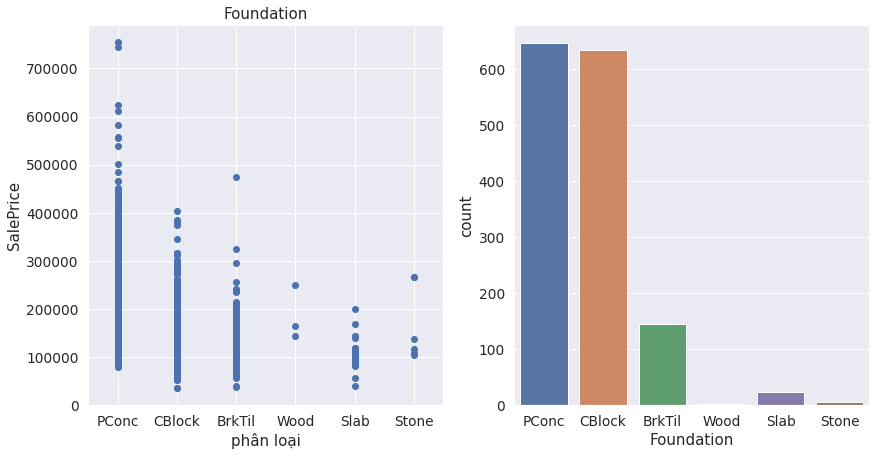

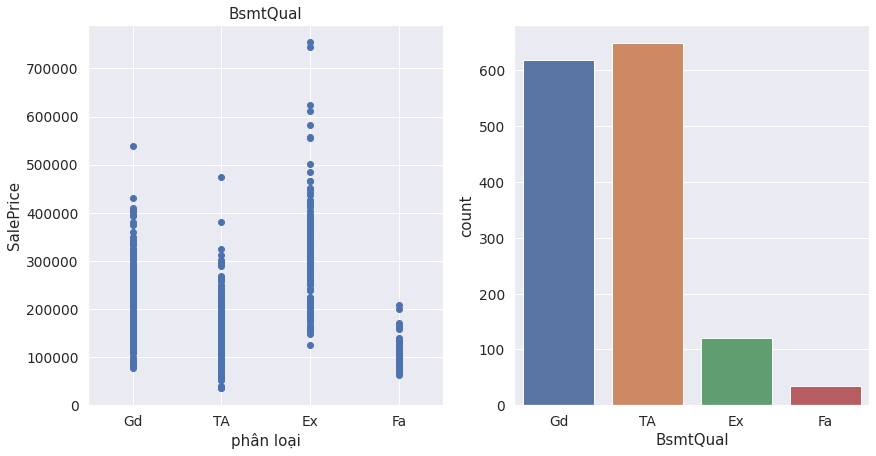

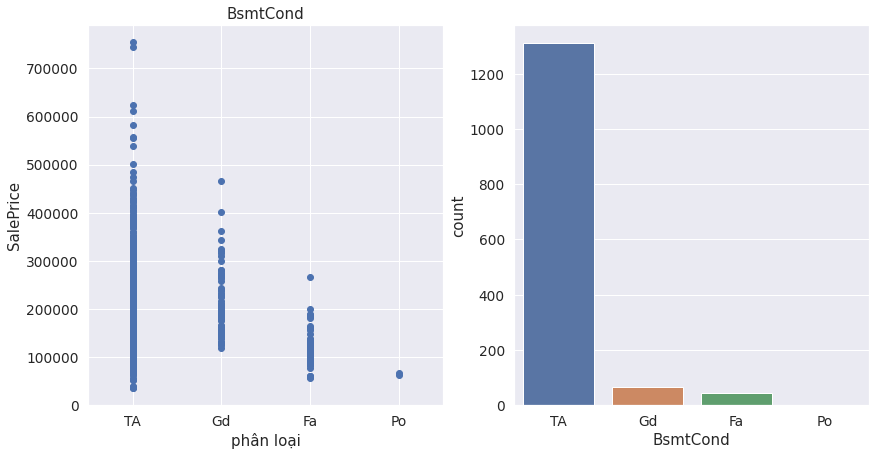

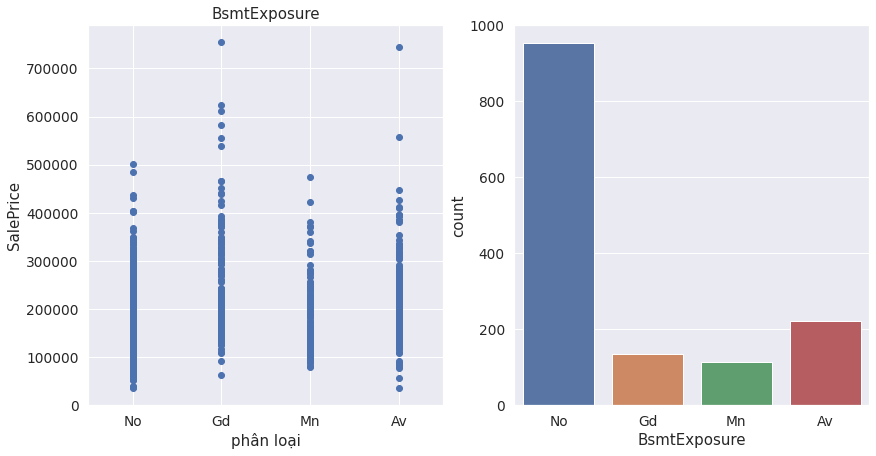

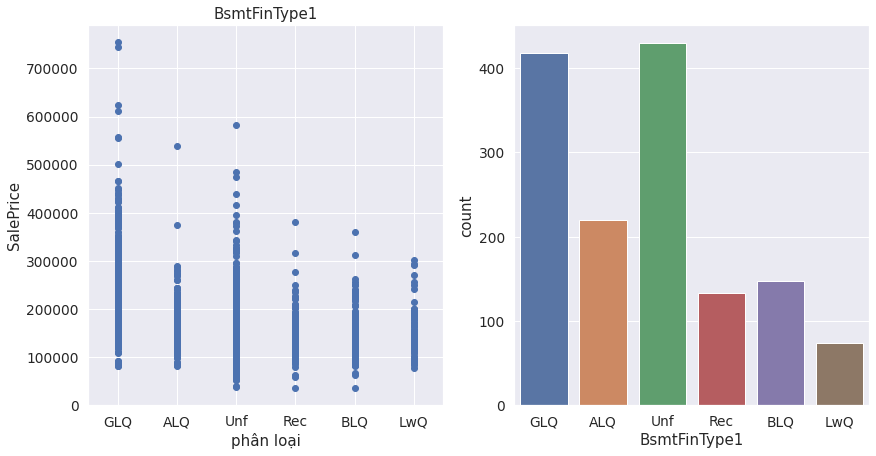

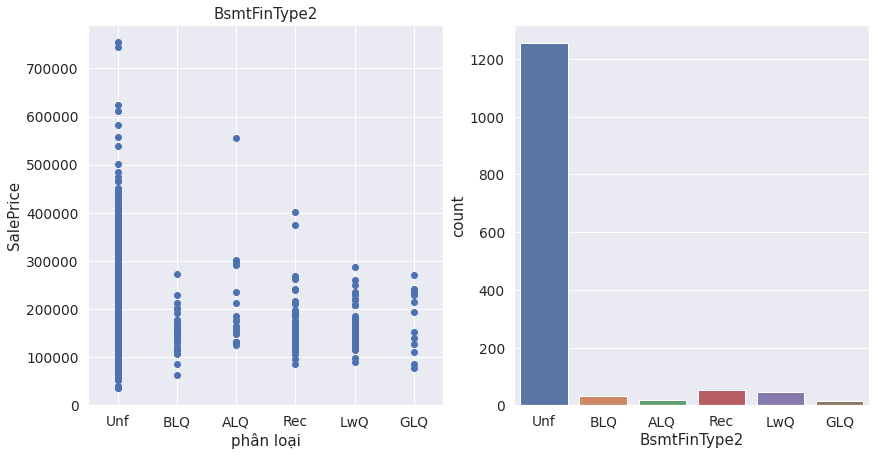

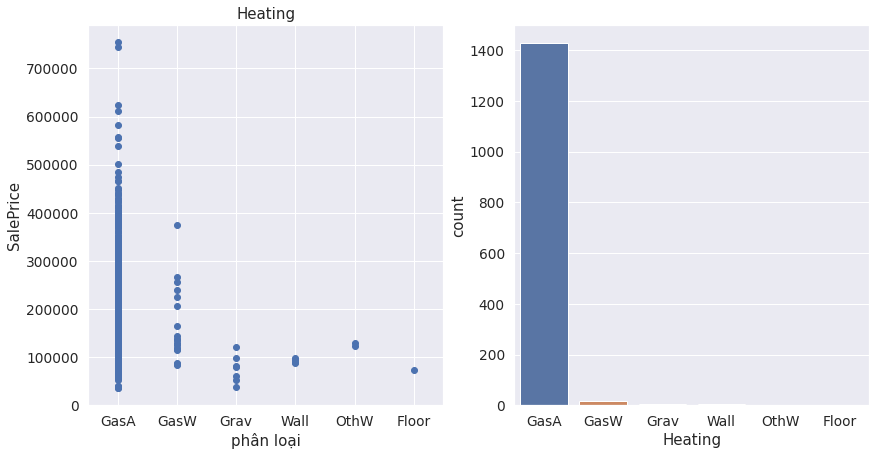

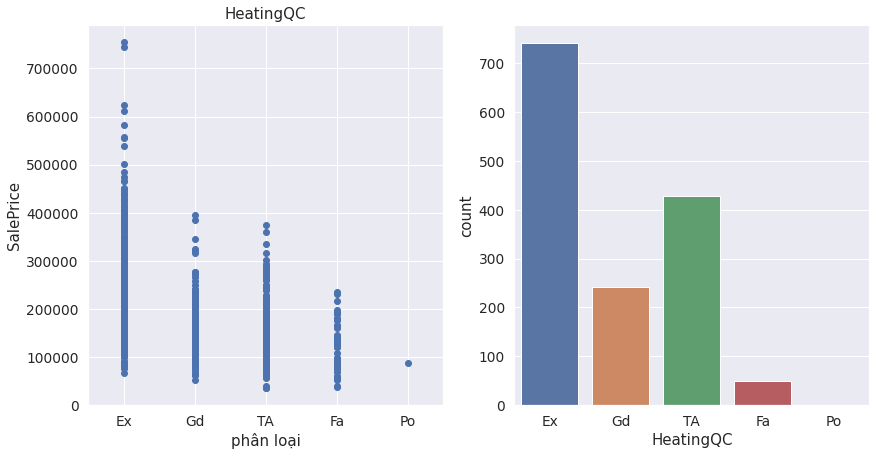

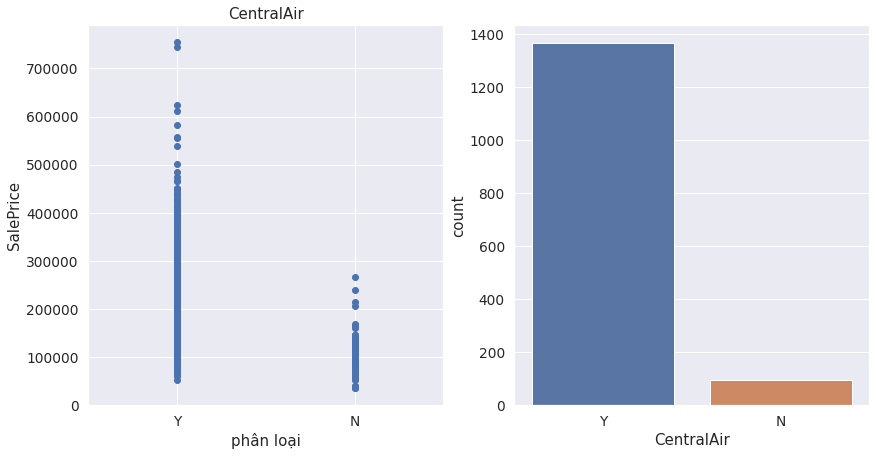

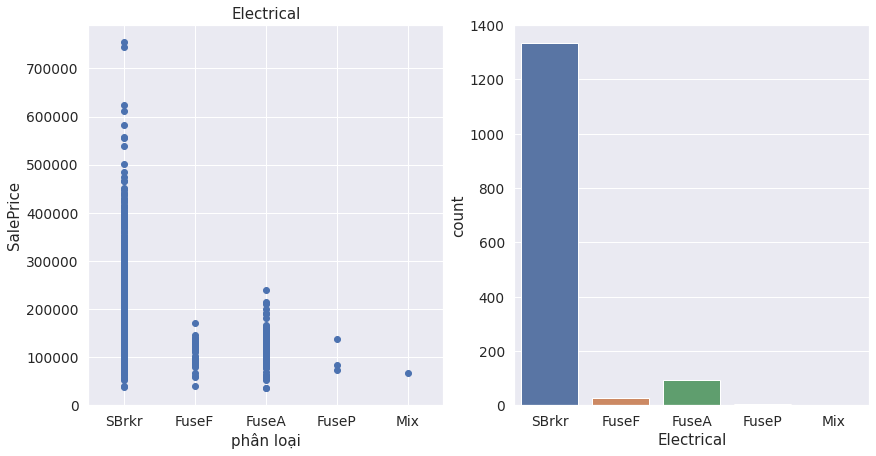

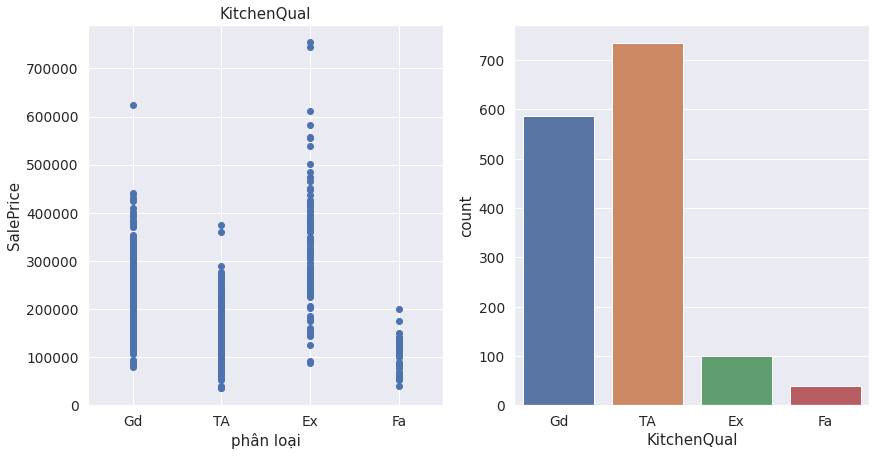

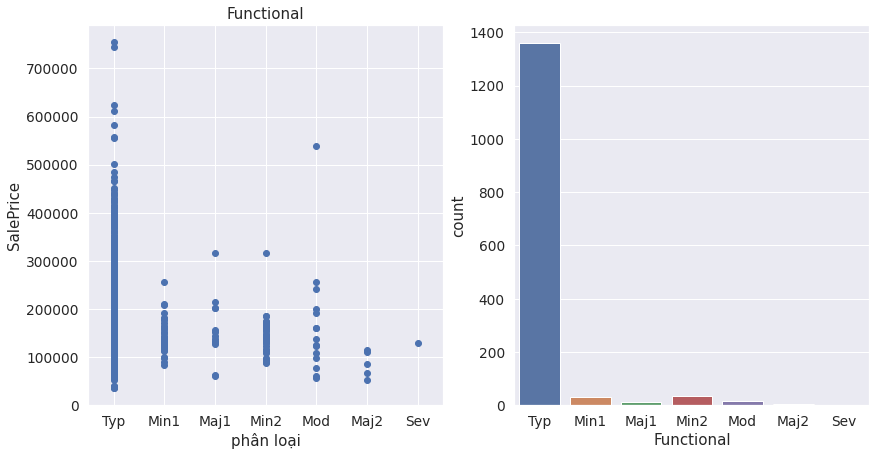

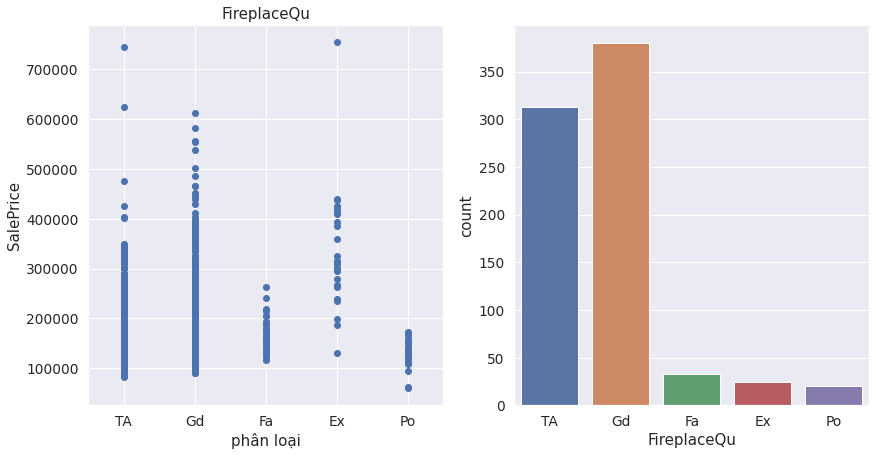

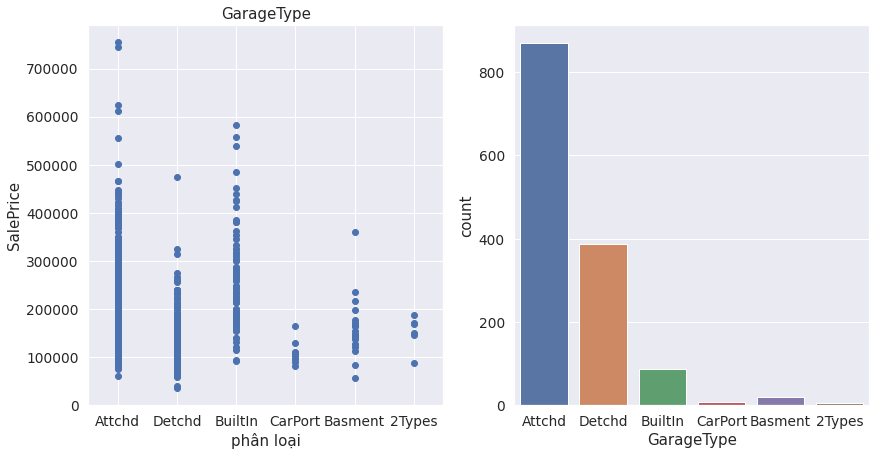

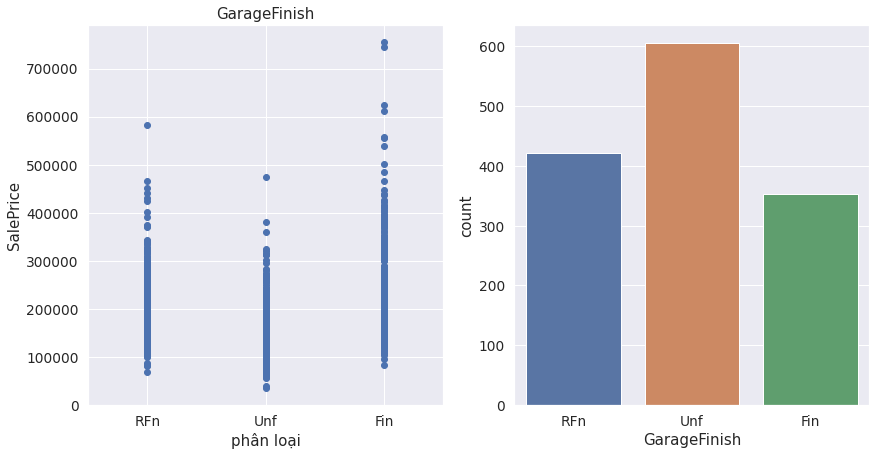

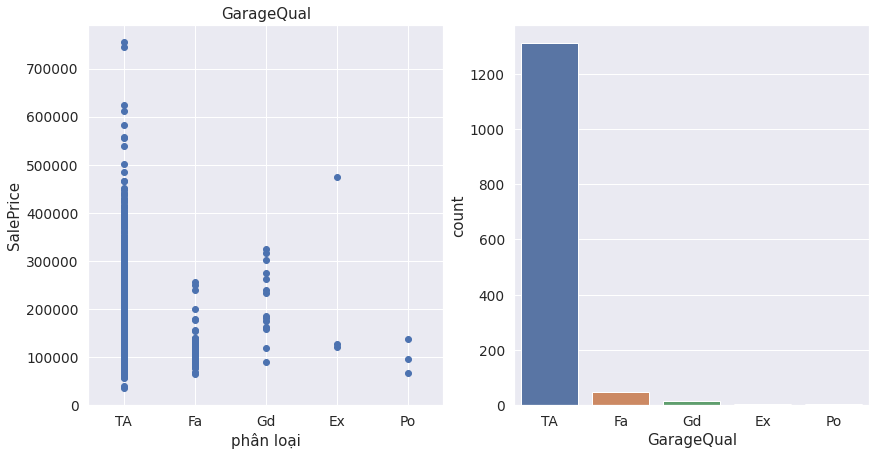

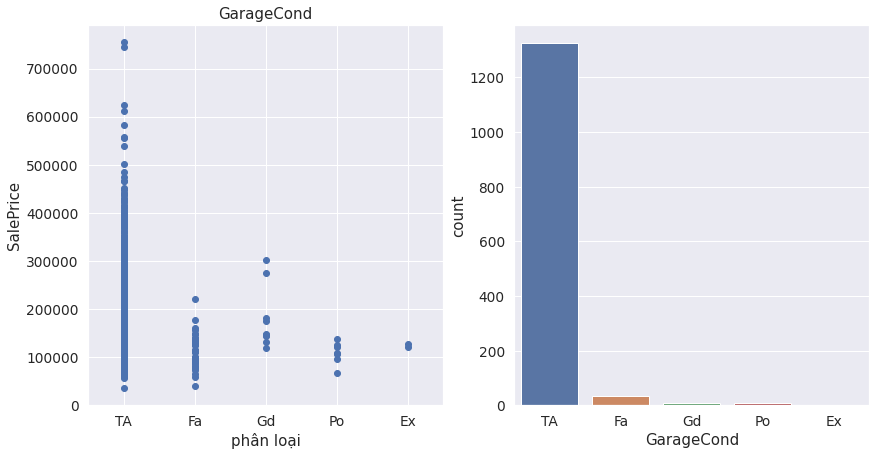

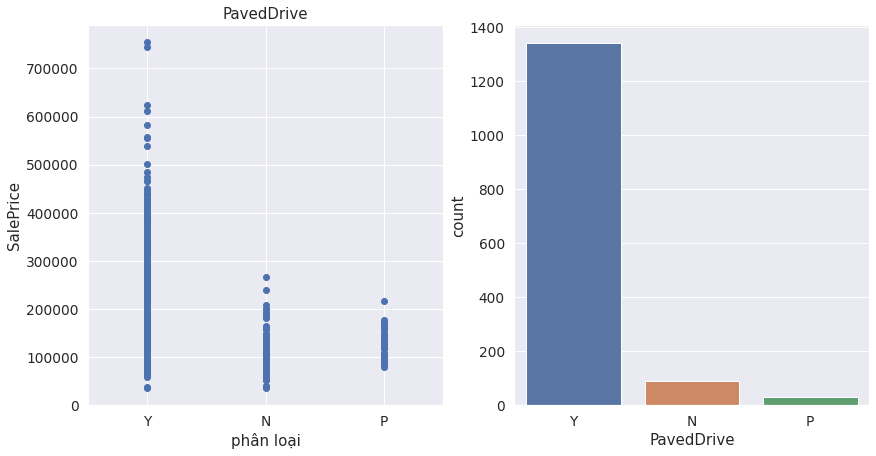

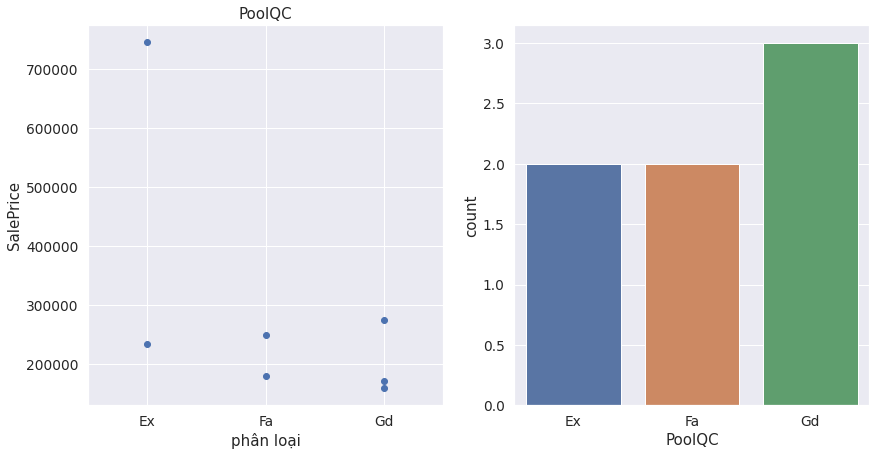

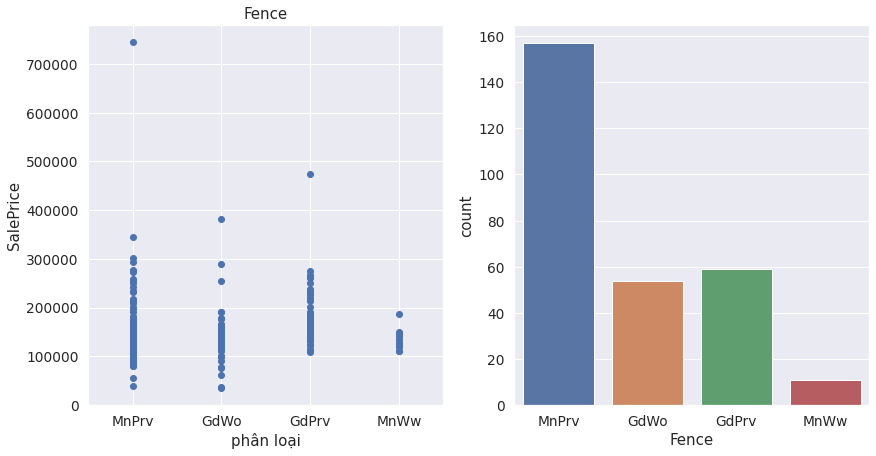

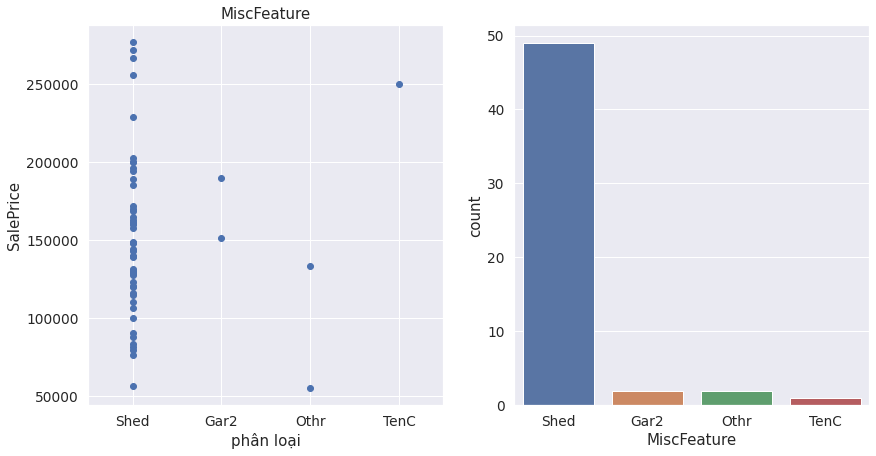

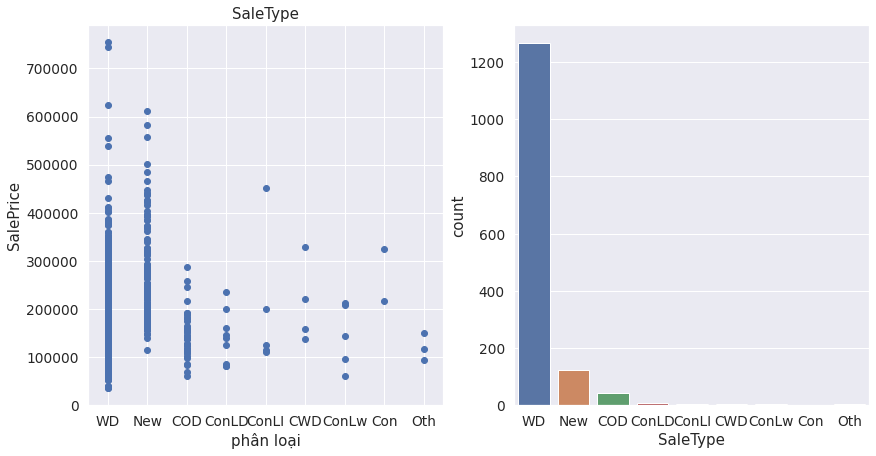

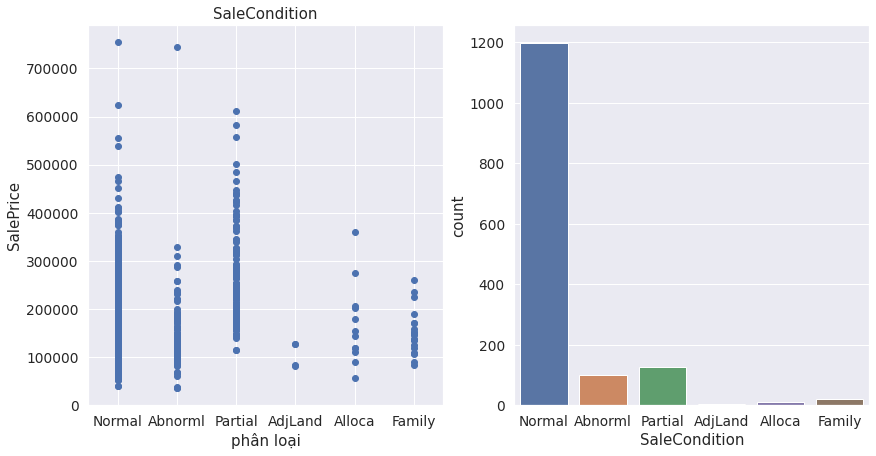

In [339]:
for feature in categorical_columns: 
    
    X = train[feature].dropna()
    fig , (ax1, ax2) = plt.subplots(1,2, figsize=(14,7), sharex=True)
    plt.subplot(ax1)
    plot_feature(X)
    plt.subplot(ax2)
    if train[feature].dtype == np.dtype('object'):
        sns.countplot(X)
    else:
        sns.distplot(X)
plt.show()

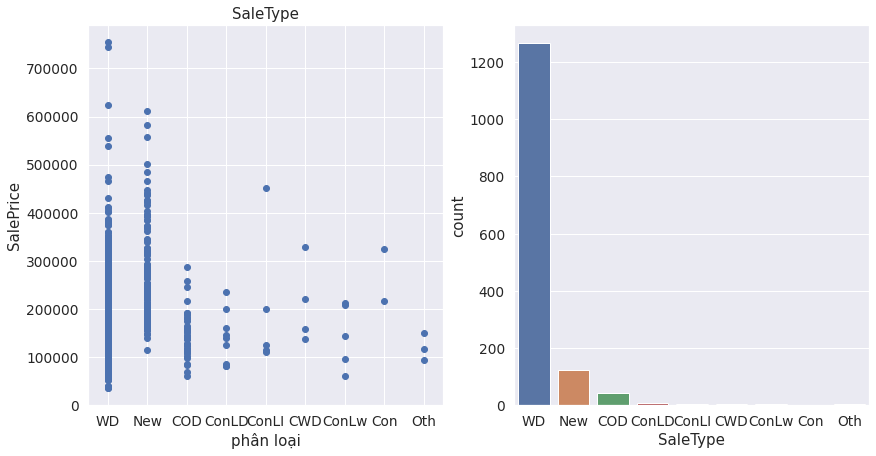

In [340]:
feature = 'SaleType'

X = train[feature].dropna()
fig , (ax1, ax2) = plt.subplots(1,2, figsize=(14,7), sharex=True)
plt.subplot(ax1)
plot_feature(X)
plt.subplot(ax2)
if train[feature].dtype == np.dtype('object'):
    sns.countplot(X)
else:
    sns.distplot(X)
        

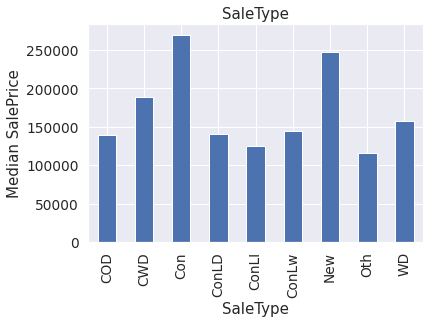

In [341]:
train.groupby('SaleType')['SalePrice'].median().plot.bar()
plt.xlabel('SaleType')
plt.ylabel('Median SalePrice')
plt.title('SaleType')
plt.show()

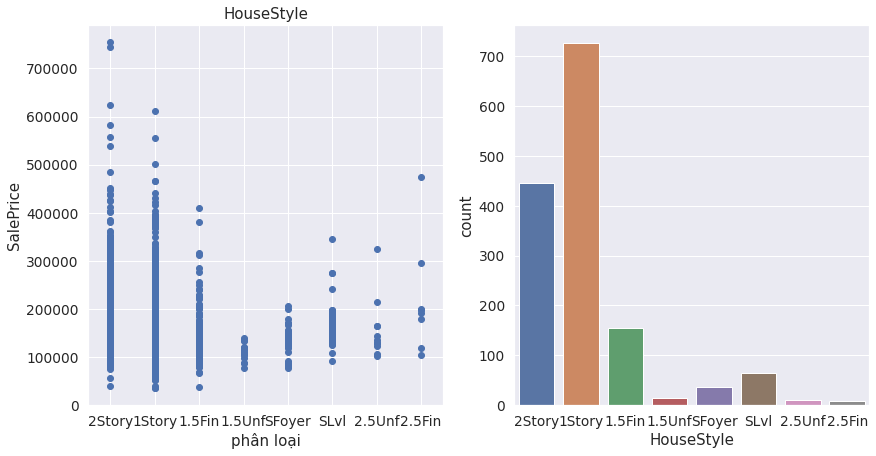

In [342]:
feature = 'HouseStyle'
X = train[feature].dropna()
fig , (ax1, ax2) = plt.subplots(1,2, figsize=(14,7), sharex=True)
plt.subplot(ax1)
plot_feature(X)
plt.subplot(ax2)
if train[feature].dtype == np.dtype('object'):
    sns.countplot(X)
else:
    sns.distplot(X)
        

# <a id='3'>3. Feature engineering</a>

+ Chúng ta kết hợp cả tập train và test (gọi là data)
+ Feature engineeing trên toàn bộ data. Sau đó chia lại 2 tập riêng dựa vào ID. 
+ Dùng dữ liệu train để xây dựng mô hình, predict trên tập test
+ Sử dụng dữ liệu tập train, phân chia validation để đo đạc độ chính xác của mô hình.


### Tổng quan các bước xử lý data: 

   +  Xóa các hàng có dữ liệu bất thường (là các hàng dữ liệu có diện tích lớn hơn 4000 và giá nhà nhỏ hơn 300.000)
   +  Xử lý dữ liệu thiếu: 
        + Tạo cột dữ liệu mới tương ứng với NaN hoặc không Nan tương ứng với các cột dữ liệu thiếu 
        + Điền NaN bằng các số liệu thích hợp hơn 
   +  Xử lý dữ liệu dạng số : 
        + Log transform với các cột dữ liệu có giá trị lớn
        + Xử lý các cột dữ liệu thời gian (cột năm xây dựng => cột thời gian sử dụng, tính tới năm 2018)
   +  Xử lý dữ liệu dạng phân loại: 
        + One hot encoding

### Xóa các cột dữ liệu bất thường ở tập train 

In [343]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

### Kết hợp cả tập train và test (gọi là data)

In [344]:
ntrain = train.shape[0]
ntest = test.shape[0]
target = train.SalePrice.values
data = pd.concat((train, test)).reset_index(drop=True)
data.drop(['SalePrice'], axis=1, inplace=True)
print("data size is : {}".format(data.shape))

data size is : (2917, 79)


# <a id='3.1'>3.1. Xử lý missing data</a>
<img src="./imgs/cleand_data.jpg" alt="drawing" width="300"/>


#### Xem xét lại bảng missing data

In [345]:
missing_values_table(data).head(10)

,Missing Values,% of Total Values
PoolQC,2908,99.7
MiscFeature,2812,96.4
Alley,2719,93.2
Fence,2346,80.4
FireplaceQu,1420,48.7
LotFrontage,486,16.7
GarageFinish,159,5.5
GarageQual,159,5.5
GarageCond,159,5.5
GarageYrBlt,159,5.5


In [346]:
missing_values_table(data).index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt', 'GarageType',
       'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1',
       'MasVnrType', 'MasVnrArea', 'MSZoning', 'BsmtFullBath', 'BsmtHalfBath',
       'Functional', 'Utilities', 'GarageArea', 'GarageCars', 'Electrical',
       'KitchenQual', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1',
       'Exterior2nd', 'Exterior1st', 'SaleType'],
      dtype='object')

Các hướng phổ biến để xử lý missing data: 
   + Tạo cột mới chứa thông tin Nan của trường dữ liệu (Nan or NonNan)
   + Thay Nan bằng các giá trị phù hợp. Ví dụ: Với các dữ liệu số dương, thay Nan bằng các giá trị khác dấu (-1), giá trị lớn hơn hẳn (999), giá trị mean của trường dữ liệu,...
   + Xây dựng mô hình dự đoán Nan sử dụng thông tin của các cột dữ liệu khác 

#### Các trường có tỷ lệ missing cao : "PoolQC", "MiscFeature", "Alley", "FireplaceQu", "LotFrontage"
    

#### Tạo thêm cột mới xem cột có NaN hay không 

#### Xử lý tương tự với các trường  "MiscFeature", "FireplaceQu", "Fence", "FireplaceQu", "LotFrontage"

In [347]:
create_nan_columns = ["MiscFeature", "FireplaceQu", "Fence", "FireplaceQu", "LotFrontage"]
for feature in create_nan_columns: 
    data[feature+"_NAN"] = data[feature].isnull()*1

#### Fill Nan
 + Với các cột có tỉ lệ NaN thấp, có thể điền NaN bằng giá trị có tần suất xuất hiện lớn nhất. Ở đây chúng ta có các trường có tỉ lệ NaN thấp: 

    MSZoning,	BsmtFullBath,	BsmtHalfBath,	Functional,	Utilities,	  GarageArea,	GarageCars,	

    Electrical,	KitchenQual,	TotalBsmtSF,	BsmtUnfSF, 	BsmtFinSF2,   BsmtFinSF1,	Exterior2nd

    Exterior1st,	SaleType
 
 + Các cột còn lại chia thành 2 loại: Numeric và Categorical. Các dữ liệu số liên quan tới diện tích các kiểu phòng. Nguyên nhân missing data của các trường này thường do nhà thiết kế không có những loại phòng này (Garage). Nên với các trường số, fillna bởi 0, các trường phân loại sẽ fillnan bởi  giá trị phân loại khác ("None").

#### Xử lý các trường dữ liệu có số lượng NaN ít 

In [348]:
rate_nan_columns = ['MSZoning', 'BsmtFullBath', 'BsmtHalfBath', 'Functional','Utilities', 
                    'GarageArea','GarageCars','Electrical','KitchenQual','TotalBsmtSF',
                    'BsmtUnfSF', 'BsmtFinSF2',  'BsmtFinSF1','Exterior2nd', 'Exterior1st','SaleType']
for feature in rate_nan_columns:
    data[feature] = data[feature].fillna(data[feature].mode()[0])

#### Bảng missing thu được 

In [349]:
missing_values_table(data)

,Missing Values,% of Total Values
PoolQC,2908,99.7
MiscFeature,2812,96.4
Alley,2719,93.2
Fence,2346,80.4
FireplaceQu,1420,48.7
LotFrontage,486,16.7
GarageYrBlt,159,5.5
GarageFinish,159,5.5
GarageQual,159,5.5
GarageCond,159,5.5


Tên các trường bao gồm 

In [350]:
missing_values_table(data).index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageType',
       'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1',
       'MasVnrType', 'MasVnrArea'],
      dtype='object')

In [351]:
numeric_nan = data[missing_values_table(data).index].select_dtypes(include=[np.number])

In [352]:
categotical_nan = data[missing_values_table(data).index].select_dtypes(exclude=[np.number])

In [353]:
numeric_nan

,LotFrontage,GarageYrBlt,MasVnrArea
0,65.0,2003.0,196.0
1,80.0,1976.0,0.0
2,68.0,2001.0,162.0
3,60.0,1998.0,0.0
4,84.0,2000.0,350.0
...,...,...,...
2912,21.0,NaN,0.0
2913,21.0,1970.0,0.0
2914,160.0,1960.0,0.0
2915,62.0,NaN,0.0


In [354]:
categotical_nan

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,GarageFinish,GarageQual,GarageCond,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,BsmtFinType1,MasVnrType
0,NaN,NaN,NaN,NaN,NaN,RFn,TA,TA,Attchd,TA,No,Gd,Unf,GLQ,BrkFace
1,NaN,NaN,NaN,NaN,TA,RFn,TA,TA,Attchd,TA,Gd,Gd,Unf,ALQ,None
2,NaN,NaN,NaN,NaN,TA,RFn,TA,TA,Attchd,TA,Mn,Gd,Unf,GLQ,BrkFace
3,NaN,NaN,NaN,NaN,Gd,Unf,TA,TA,Detchd,Gd,No,TA,Unf,ALQ,None
4,NaN,NaN,NaN,NaN,TA,RFn,TA,TA,Attchd,TA,Av,Gd,Unf,GLQ,BrkFace
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,No,TA,Unf,Unf,None
2913,NaN,NaN,NaN,NaN,NaN,Unf,TA,TA,CarPort,TA,No,TA,Unf,Rec,None
2914,NaN,NaN,NaN,NaN,TA,Unf,TA,TA,Detchd,TA,No,TA,Unf,ALQ,None
2915,NaN,Shed,NaN,MnPrv,NaN,NaN,NaN,NaN,NaN,TA,Av,Gd,Unf,GLQ,None


#### Fillnan cho các trường số 

In [355]:
for feature in numeric_nan.columns:
    data[feature]= data[feature].fillna(0)

#### Fillnan cho các trường phân loại 

In [356]:
for feature in categotical_nan.columns:
    data[feature]= data[feature].fillna("None")

#### Kiểm tra kết quả NaN cuối cùng

In [357]:
missing_values_table(data)

,Missing Values,% of Total Values


# <a id='3.2'>3.2. Xử lý dữ liệu dạng số</a>

### Các hướng cơ bản xử lý dữ liệu dạng số

+ Dữ liệu năm : Tạo cột mới chuyển feature năm sang feature thời gian
+ Sử dụng transform log cho các cột dữ liệu có giá trị lớn

In [358]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_columns = numeric_features.columns
data[numeric_columns].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MiscFeature_NAN,FireplaceQu_NAN,Fence_NAN,LotFrontage_NAN
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,2,2008,1,1,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,5,2007,1,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,9,2008,1,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,2,2006,1,0,1,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,12,2008,1,0,1,0


In [359]:
numeric_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MiscFeature_NAN', 'FireplaceQu_NAN', 'Fence_NAN',
       'LotFrontage_NAN'],
      dtype='object')

#### Có 3 cột dữ liệu năm: "YearBuilt", "YearRemodAdd", "GarageYrBlt"

#### Tạo 3 cột dữ liệu mới 

In [360]:
data['YearBuiltDur'] = 2018 - data['YearBuilt']
data['YearRemodAddDur'] = 2018 - data['YearRemodAdd']
data['GarageYrBltDur'] = 2018 - data['GarageYrBlt']

#### Sử dụng phép biến đổi log cho những cột chênh lệch lớn

<img src="./imgs/skewed.jpg" alt="drawing" width="300"/>

In [361]:
transform_columns = ["LotArea", "MasVnrArea", "BsmtFinSF1","BsmtUnfSF", "TotalBsmtSF",
                     "1stFlrSF","2ndFlrSF", "GrLivArea","GarageArea", "WoodDeckSF", 
                     "OpenPorchSF","3SsnPorch","ScreenPorch", "PoolArea"]

In [362]:
#data[transform_columns] = data[transform_columns].replace(0, np.nan)
data.loc[:,transform_columns] = np.log1p(data[transform_columns])
#data[transform_columns] = data[transform_columns].replace(np.nan, 0)
data[transform_columns].head(10)

,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea
0,9.042040,5.283204,6.561031,5.017280,6.753438,6.753438,6.751101,7.444833,6.308098,0.000000,4.127134,0.000000,0.0,0.0
1,9.169623,0.000000,6.886532,5.652489,7.141245,7.141245,0.000000,7.141245,6.133398,5.700444,0.000000,0.000000,0.0,0.0
2,9.328212,5.093750,6.188264,6.075346,6.825460,6.825460,6.765039,7.488294,6.411818,0.000000,3.761200,0.000000,0.0,0.0
3,9.164401,0.000000,5.379897,6.293419,6.629363,6.869014,6.629363,7.448916,6.466145,0.000000,3.583519,0.000000,0.0,0.0
4,9.565284,5.860786,6.486161,6.196444,7.044033,7.044033,6.960348,7.695758,6.729824,5.262690,4.442651,0.000000,0.0,0.0
5,9.555064,0.000000,6.597146,4.174387,6.680855,6.680855,6.340359,7.217443,6.175867,3.713572,3.433987,5.771441,0.0,0.0
6,9.218804,5.231109,7.222566,5.762051,7.430707,7.435438,0.000000,7.435438,6.456770,5.545177,4.060443,0.000000,0.0,0.0
7,9.247925,5.484797,6.756932,5.379897,7.010312,7.010312,6.891626,7.645398,6.184149,5.463832,5.323010,0.000000,0.0,0.0
8,8.719481,0.000000,0.000000,6.859615,6.859615,6.930495,6.624065,7.481556,6.150603,4.510860,0.000000,0.000000,0.0,0.0
9,8.912069,0.000000,6.747587,4.948760,6.899723,6.982863,0.000000,6.982863,5.327876,0.000000,1.609438,0.000000,0.0,0.0


# <a id='3.3'>3.3. Xử lý dữ liệu dạng phân loại </a>

### Với dữ liệu phân loại, có nhiều phương pháp giúp [encoding](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02):
   + One Hot Encoding
   + Label Encoding
   + Frequency Encoding
   + Mean Encoding
   + Target encoding
   + Weight of Evidence Encoding
   + Entity Encoding
   
Khi xây dựng baseline cho mô hình, chúng ta sẽ sử dụng One Hot Encoding.

Lưu ý khi sử dụng encoding: để đảm bảo số chiều tương thích của tập train và test, encoding cần được áp dụng cho cả tập train và test (toàn tập data); như vậy, trong trường hợp tập test không có một lớp phân loại bất kỳ thì số lượng dữ liệu ở tập train sẽ đủ nhiều để có thể vét hết tất cả lớp phân loại của trên tập test. 

#### One Hot Encoding


One Hot Encoding tạo các cột mới cho biết sự hiện diện (hoặc vắng mặt) của mỗi giá trị có thể có trong dữ liệu. Để hiểu rõ, cùng xem xét hình dưới 



![onehot](https://i.imgur.com/TW5m0aJ.png)

In [363]:
categorical_features = data.select_dtypes(exclude=[np.number])
categorical_columns = categorical_features.columns
data[categorical_columns].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


### One hot encoding

Sử dụng lệnh get_dummies của pandas để thực hiện one hot encooding

In [364]:
data = pd.get_dummies(data)
print(data.shape)

(2917, 308)


In [365]:
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0,0,0,1,0,0,0,0,1,0


In [366]:
target = train['SalePrice'].values

In [367]:
train_set = data[:ntrain]
test_set = data[ntrain:]

In [368]:
test_set.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1458,20,80.0,9.360741,5,6,1961,1961,0.000000,6.150603,144.0,...,0,0,0,1,0,0,0,0,1,0
1459,20,81.0,9.565775,6,6,1958,1958,4.691348,6.828712,0.0,...,0,0,0,1,0,0,0,0,1,0
1460,60,74.0,9.534668,5,5,1997,1998,0.000000,6.674561,0.0,...,0,0,0,1,0,0,0,0,1,0
1461,60,78.0,9.208238,6,6,1998,1998,3.044522,6.401917,0.0,...,0,0,0,1,0,0,0,0,1,0
1462,120,43.0,8.518392,8,5,1992,1992,0.000000,5.575949,0.0,...,0,0,0,1,0,0,0,0,1,0
1463,60,75.0,9.210440,6,5,1993,1994,0.000000,0.000000,0.0,...,0,0,0,1,0,0,0,0,1,0
1464,20,0.0,8.984819,6,7,1992,2007,0.000000,6.841615,0.0,...,0,0,0,1,0,0,0,0,1,0
1465,60,63.0,9.036344,6,5,1998,1998,0.000000,0.000000,0.0,...,0,0,0,1,0,0,0,0,1,0
1466,20,85.0,9.227886,7,5,1990,1990,0.000000,6.458338,0.0,...,0,0,0,1,0,0,0,0,1,0
1467,20,70.0,9.036106,4,5,1970,1970,0.000000,6.690842,78.0,...,0,0,0,1,0,0,0,0,1,0


In [369]:
train_set.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0,0,0,1,0,0,0,0,1,0
5,50,85.0,9.555064,5,5,1993,1995,0.000000,6.597146,0.0,...,0,0,0,1,0,0,0,0,1,0
6,20,75.0,9.218804,8,5,2004,2005,5.231109,7.222566,0.0,...,0,0,0,1,0,0,0,0,1,0
7,60,0.0,9.247925,7,6,1973,1973,5.484797,6.756932,32.0,...,0,0,0,1,0,0,0,0,1,0
8,50,51.0,8.719481,7,5,1931,1950,0.000000,0.000000,0.0,...,0,0,0,1,1,0,0,0,0,0
9,190,50.0,8.912069,5,6,1939,1950,0.000000,6.747587,0.0,...,0,0,0,1,0,0,0,0,1,0


# <a id='4'>4. Xây dựng mô hình</a>

# <a id='4.1'>4.1. Chia dữ liệu thành training và validation</a> 

Dữ liệu được phân bố như sau 

![training_valid](./imgs/training-validation.jpg)

Ở đây chúng ta sẽ: 
   + Biến đổi target = log(1+target) để tiện lợi do đạc kết quả 
   + Chia dữ liệu training set thành 2 phần : traing set và validaton set theo tỉ lệ 8/2
   + Huấn luyện mô hình linear regression trên tập train, kiểm tra trên tập validation 
   + Sử dụng weight của mô hình dự đoán cho tập dữ liệu test.  

### Chia dữ liệu training-validation tỉ lệ 8/2 + Biến đổi log(1+p). 

In [370]:
target = np.log1p(train['SalePrice'].values)

In [371]:
X_train, X_valid, y_train, y_valid = train_test_split(train_set, target, test_size=0.2) 

### Fit mô hình Random Forest trên tập training

In [372]:
params = {  'bootstrap': True,
            'criterion': 'mse',
            'max_depth': 4,
            'max_features': 'auto',
            'max_leaf_nodes': None,
            'min_impurity_decrease': 0.0,
            'min_impurity_split': None,
            'min_samples_leaf': 1,
            'min_samples_split': 2,
            'min_weight_fraction_leaf': 0.0,
            'n_estimators': 100,
            'n_jobs': 1,
            'oob_score': False,
            'random_state': 42,
            'verbose': 0,
            'warm_start': False}

def run_RFR(train_X, train_y, valid_X, valid_y, params):
    """
    args: 
    + train_X : training dataset
    + valid_X : validataion dataset
    + train_y : target of training set
    + valid_y : target of validation set
    + params : parameters of RandomForestRegressor
    
    output: 
    
    + model   : The RandomForestRegressor model which is trained by the train_X, train_y
    + y_predict : The prediction of valid_X by using the above model
    """
    model = RandomForestRegressor( max_depth = params['max_depth'], random_state=0)
    model = model.fit(train_X, train_y)
    y_predict =  model.predict(X_valid)
    rmse = mean_squared_error(y_valid, y_predict, squared = False)
    print(rmse)
    return  model, y_predict

In [373]:
RFR, _  = run_RFR(X_train, y_train, X_valid, y_valid, params)

0.17547712140960323


### In kết quả score mean squared error

### Dự đoán kết quả trên tập test, ghi dự đoán trên file csv

In [374]:
predicted_X_test = RFR.predict(test_set)

Sử  dụng biến đổi exp cho "predicted_X_test"

In [375]:
predicted_X_test = np.expm1(predicted_X_test)

#### Đọc lại file test

In [376]:
test  = pd.read_csv('./data/house-prices/test.csv')

In [377]:
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


### Ghi file dự đoán 

In [378]:
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_X_test})
# you could use any filename. We choose submission here
my_submission.to_csv('./submission.csv', index=False)

### Kết quả dự đóan 

In [379]:
my_submission.head(10)

,Id,SalePrice
0,1461,127300.246640
1,1462,143104.083686
2,1463,171054.437595
3,1464,176429.122220
4,1465,223932.909689
5,1466,172332.741246
6,1467,144960.248055
7,1468,171623.120874
8,1469,185540.344709
9,1470,122121.381125
